In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names, get_histplot, get_scatter_marker_size, get_coeffs
from scipy import stats
import seaborn as sns

In [2]:
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')
df_referral = pd.read_csv('./vidas_data/survival_time.csv', parse_dates=['EOH', 'SOH'])

In [3]:
print(get_file_names(['IDEHR', 'EHRType', 'opt_appetito'], df_ref))
print(get_file_names(['IDEHR', 'EHRType', 'opt_nausea'], df_ref))

['wH_DirectTable_Scala_ESAS', 'wH_DirectTable_C_Scala_ESAS']
['wH_DirectTable_Scala_ESAS', 'wH_DirectTable_C_Scala_ESAS', 'wH_DirectTable_VISITA_MED_VIDAS', 'wH_DirectTable_C_VISITA_MED_VIDAS']


In [4]:
# do the merge
df_as = pd.read_csv('./vidas_data/wH_DirectTable_Scala_ESAS.csv', parse_dates=['TimeStamp_Insert'])
df_as = df_as[['IDEHR', 'EHRType', 'TimeStamp_Insert', 'opt_appetito']].dropna().rename(columns={'opt_appetito': 'appetite'})
df_ns = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_MED_VIDAS.csv', parse_dates=['TimeStamp_Insert'])
df_ns = df_ns[['IDEHR', 'EHRType', 'TimeStamp_Insert', 'opt_nausea']].dropna().rename(columns={'opt_nausea': 'nausea'})
df_aa = pd.merge(df_referral, df_as, on=['IDEHR', 'EHRType']).dropna().sort_values(by=['IDEHR', 'TimeStamp_Insert'], ascending=[True, True]).reset_index(drop=True)
df_na = pd.merge(df_referral, df_ns, on=['IDEHR', 'EHRType']).dropna().sort_values(by=['IDEHR', 'TimeStamp_Insert'], ascending=[True, True]).reset_index(drop=True)

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16,17,18,19,20,21,22,50,97,98,100,116,142) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df_aa

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,appetite
0,1489,2015-12-27 03:00:00,AMB,2015-04-21 03:36:25.613,249.0,Palliative (Non-Malignant),586,2015-12-10 12:31:32.910,0#0
1,1760,2016-01-12 07:30:00,AMB,2015-04-16 21:20:34.270,270.0,Palliative (Non-Malignant),1,2015-04-21 19:28:37.870,1#1
2,1994,2016-07-09 20:00:00,AMB,2015-04-15 22:42:22.550,450.0,Cervical-Ovarian,1830,2015-11-27 20:13:44.800,1#1
3,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-01 13:46:03.970,2#2
4,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-08 14:46:07.657,2#2
...,...,...,...,...,...,...,...,...,...
4560,29398,2020-07-21 19:30:57,AMB,2020-07-17 09:37:05.790,4.0,Breast,1749,2020-07-21 11:54:38.257,4#4
4561,29399,2020-07-23 00:00:21,AMB,2020-07-17 10:08:54.310,5.0,Lung,1630,2020-07-20 12:47:13.370,4#4
4562,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 19:00:04.973,1#1
4563,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-22 18:09:50.193,1#1


In [6]:
df_na

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,nausea
0,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 13:14:08.350,Controllata#2
1,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 14:49:10.823,Controllata#2
2,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-12 12:35:54.400,Controllata#2
3,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-14 12:57:43.523,Controllata#2
4,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-15 12:24:44.353,Controllata#2
...,...,...,...,...,...,...,...,...,...
8395,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-15 10:11:59.223,occasionale#0
8396,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-17 15:40:20.710,occasionale#0
8397,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-21 09:34:00.360,occasionale#0
8398,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 18:59:35.257,occasionale#0


In [7]:
df_aa.appetite.value_counts()

0#0      905
5#5      581
3#3      540
4#4      506
2#2      488
6#6      355
8#8      336
7#7      292
1#1      169
N.R.     157
10#10    137
9#9       99
Name: appetite, dtype: int64

In [8]:
# clean up the entries in the dframes
df_aa.loc[df_aa['appetite'] == 'N.R.', 'appetite'] = np.nan
df_aa['appetite'] = df_aa.appetite.str.findall('(\d+)#')
df_aa['appetite'] = df_aa['appetite'].apply(lambda x: np.nan if isinstance(x, float) else int(x[0]))

In [9]:
df_aa['hos_days'] = pd.to_timedelta(df_aa['TimeStamp_Insert'] - df_aa['SOH']).dt.days
df_aa.astype({'hos_days': 'float32'}).dtypes
df_aa = df_aa.dropna()
df_aa

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,appetite,hos_days
0,1489,2015-12-27 03:00:00,AMB,2015-04-21 03:36:25.613,249.0,Palliative (Non-Malignant),586,2015-12-10 12:31:32.910,0.0,233
1,1760,2016-01-12 07:30:00,AMB,2015-04-16 21:20:34.270,270.0,Palliative (Non-Malignant),1,2015-04-21 19:28:37.870,1.0,4
2,1994,2016-07-09 20:00:00,AMB,2015-04-15 22:42:22.550,450.0,Cervical-Ovarian,1830,2015-11-27 20:13:44.800,1.0,225
3,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-01 13:46:03.970,2.0,28
4,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-08 14:46:07.657,2.0,35
...,...,...,...,...,...,...,...,...,...,...
4560,29398,2020-07-21 19:30:57,AMB,2020-07-17 09:37:05.790,4.0,Breast,1749,2020-07-21 11:54:38.257,4.0,4
4561,29399,2020-07-23 00:00:21,AMB,2020-07-17 10:08:54.310,5.0,Lung,1630,2020-07-20 12:47:13.370,4.0,3
4562,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 19:00:04.973,1.0,0
4563,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-22 18:09:50.193,1.0,5


In [10]:
df_na.nausea.value_counts()

occasionale#0    5182
Controllata#2    1740
persistente#1    1443
N.R.               35
Name: nausea, dtype: int64

In [11]:
df_na.loc[df_na['nausea'] == 'N.R.', 'nausea'] = np.nan
df_na['nausea'] = df_na.nausea.str.findall('(\w+)#')
df_na['nausea'] = df_na['nausea'].apply(lambda x: np.nan if isinstance(x, float) else x[0])
df_na.loc[df_na['nausea'] == 'occasionale', 'nausea'] = 'occasional'
df_na.loc[df_na['nausea'] == 'Controllata', 'nausea'] = 'controlled'
df_na.loc[df_na['nausea'] == 'persistente', 'nausea'] = 'persistent'

In [12]:
df_na['hos_days'] = pd.to_timedelta(df_na['TimeStamp_Insert'] - df_na['SOH']).dt.days
df_na.astype({'hos_days': 'float32'}).dtypes
df_na = df_na.dropna()
df_na

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,nausea,hos_days
0,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 13:14:08.350,controlled,0
1,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 14:49:10.823,controlled,1
2,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-12 12:35:54.400,controlled,3
3,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-14 12:57:43.523,controlled,5
4,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-15 12:24:44.353,controlled,6
...,...,...,...,...,...,...,...,...,...,...
8395,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-15 10:11:59.223,occasional,1
8396,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-17 15:40:20.710,occasional,4
8397,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-21 09:34:00.360,occasional,7
8398,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 18:59:35.257,occasional,0


In [13]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
sns.set(font_scale=1.5)

## Appetite (Avg.) ##

In [14]:
# appetite regression plots
df_a1 = df_aa[['IDEHR', 'hos_days', 'appetite']].groupby(by=['hos_days']).agg(['mean', 'count']).reset_index()
df_a1

hos_days         IDEHR        appetite      
                      mean count      mean count
0          0  13974.721433  1479  4.083164  1479
1          1  14836.532554  1198  3.781302  1198
2          2  16315.411972   568  3.864437   568
3          3  16299.812500   416  3.774038   416
4          4  16709.994253   174  3.385057   174
..       ...           ...   ...       ...   ...
198      689   5384.000000     1  6.000000     1
199      776   5770.000000     1  2.000000     1
200      782   4893.000000     1  5.000000     1
201      961   6762.000000     1  0.000000     1
202      966   6762.000000     1  0.000000     1

[203 rows x 5 columns]

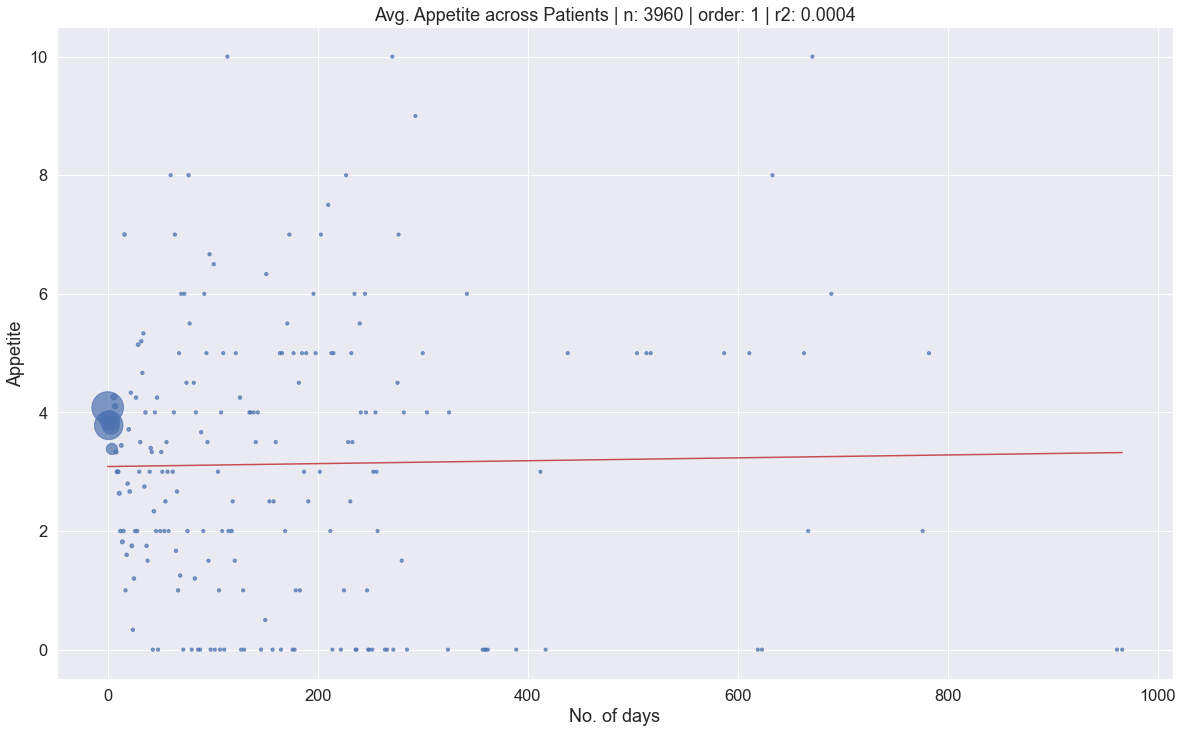

In [15]:
fig, ax = plt.subplots()
x = df_a1['hos_days']
y = df_a1['appetite']['mean']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax.scatter(x, y, s=get_scatter_marker_size(df_a1['IDEHR']['count']), alpha=0.7)
ax.plot(x, slope*x + intercept, color='r')
ax.set_title('Avg. Appetite across Patients | n: ' + str(len(df_aa.IDEHR.unique())) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
plt.savefig('./graphs/gi/app_avg.png', bbox_inches='tight')
plt.show()

C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


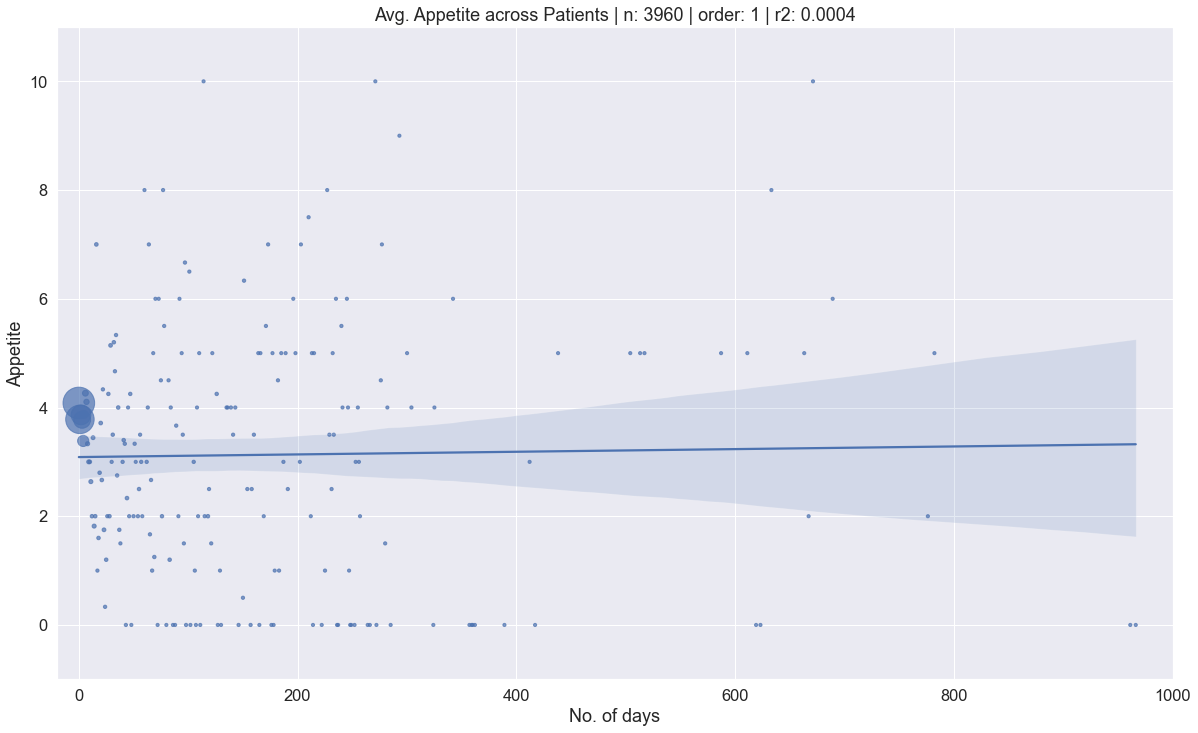

In [16]:
fig, ax = plt.subplots()
x = df_a1['hos_days']
y = df_a1['appetite']['mean']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
sns.regplot(x, y, ax=ax, scatter_kws={'s': get_scatter_marker_size(df_a1['IDEHR']['count']), 'alpha': 0.7})
ax.set_title('Avg. Appetite across Patients | n: ' + str(len(df_aa.IDEHR.unique())) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set(ylim=(-1, 11), xlim=(-20, 1000))
plt.savefig('./graphs/gi/app_avg_sns.png', bbox_inches='tight')
plt.show()

In [17]:
# ax = plt.axes()
# sns.regplot(x='hos_days', y='appetite', data=df_a1, ax=ax, order=2)
# ax.set_title('Avg. Appetite across Patients | n: ' + str(len(df_aa.IDEHR.unique())) + ' | order: 2')
# plt.show()

In [18]:
# ax = plt.axes()
# sns.regplot(x='hos_days', y='appetite', data=df_a1, ax=ax, order=3)
# ax.set_title('Avg. Appetite across Patients | n: ' + str(len(df_aa.IDEHR.unique())) + ' | order: 3')
# plt.show()

In [19]:
# appetite of patients surviving atleast x days
s_time = 60
df_a2 = df_aa[df_aa['survival_time_days'] >= s_time]
df_a2 = df_a2[df_a2['hos_days'] <= s_time]
p_num = len(df_a2.IDEHR.unique())
df_a2 = df_a2[['IDEHR', 'hos_days', 'appetite']].groupby(by=['hos_days']).agg(['mean', 'count']).reset_index()

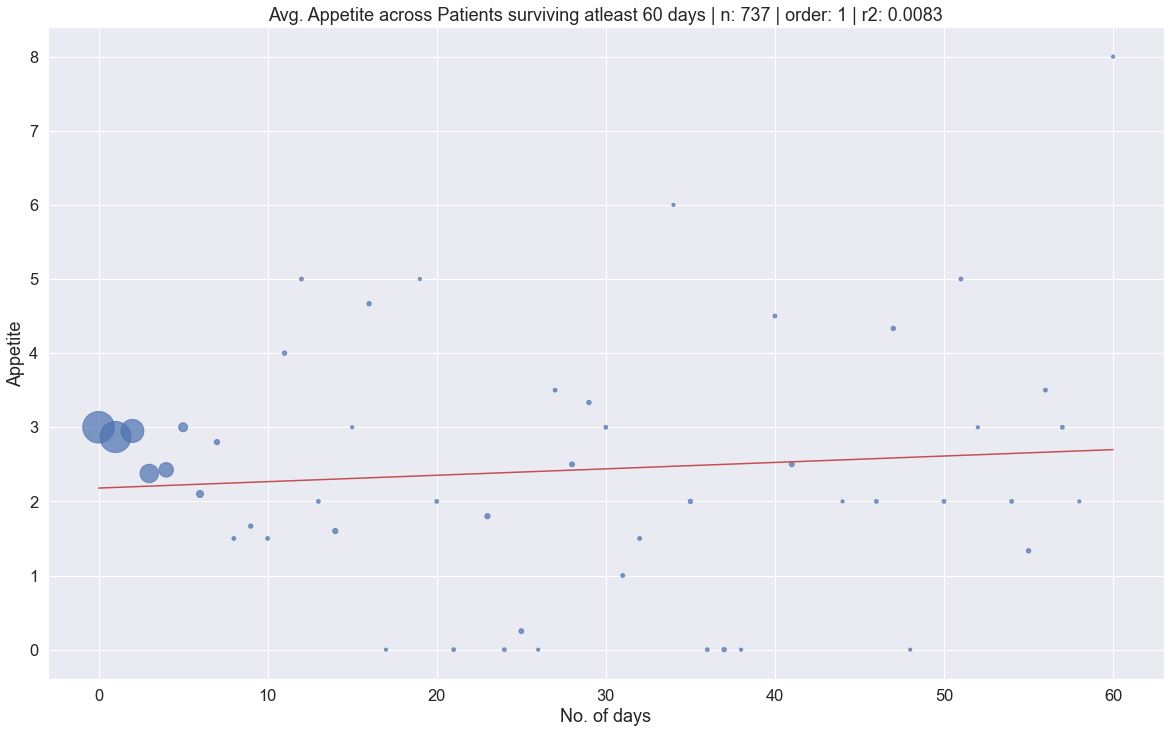

In [20]:
fig, ax = plt.subplots()
x = df_a2['hos_days']
y = df_a2['appetite']['mean']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax.scatter(x, y, s=get_scatter_marker_size(df_a2['IDEHR']['count']), alpha=0.7)
ax.plot(x, slope*x + intercept, color='r')
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set_title('Avg. Appetite across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
plt.savefig('./graphs/gi/app_avg_a60.png', bbox_inches='tight')
plt.show()

C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


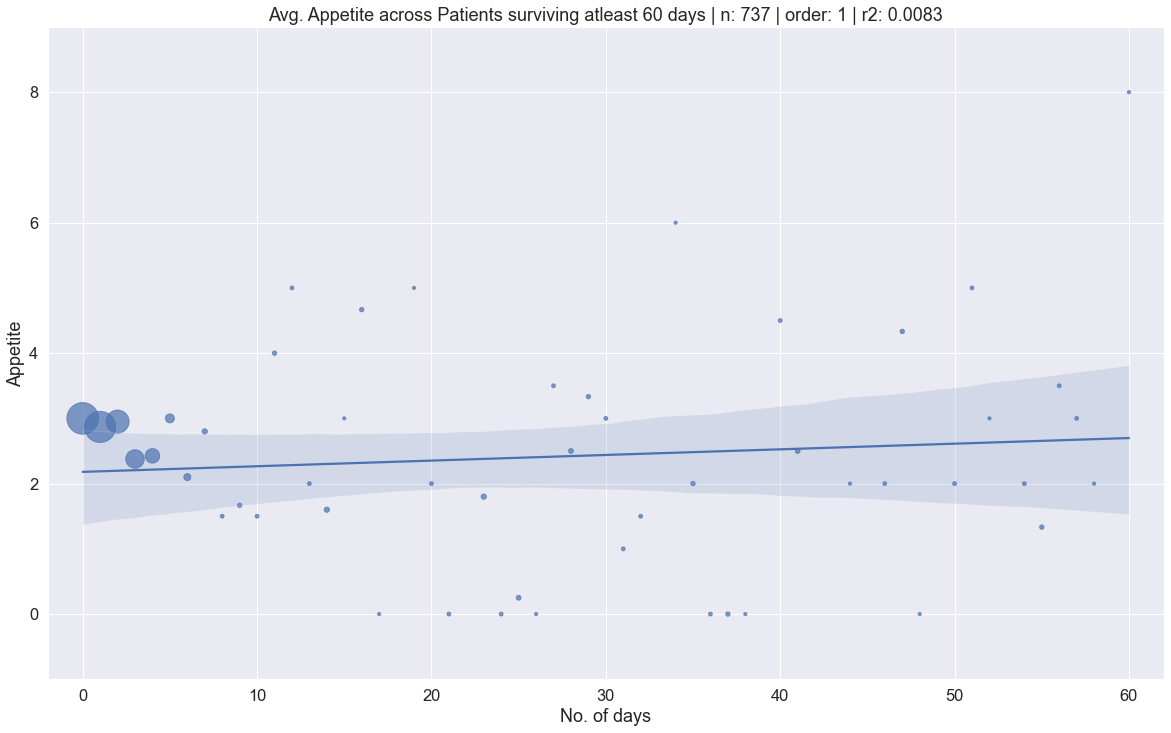

In [21]:
fig, ax = plt.subplots()
x = df_a2['hos_days']
y = df_a2['appetite']['mean']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# ax.scatter(x, y, s=get_scatter_marker_size(df_a2['IDEHR']['count']), alpha=0.7)
sns.regplot(x, y, ax=ax, scatter_kws={'s': get_scatter_marker_size(df_a2['IDEHR']['count']), 'alpha': 0.7})
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set(ylim=(-1, 9), xlim=(-2, 62))
ax.set_title('Avg. Appetite across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
plt.savefig('./graphs/gi/app_avg_a60_sns.png', bbox_inches='tight')
plt.show()

In [22]:
# ax = plt.axes()
# sns.regplot(x='hos_days', y='appetite', data=df_a2, ax=ax, order=1)
# ax.set_title('Avg. Appetite across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1')
# plt.show()

In [23]:
# appetite split by EHRType
df_a3 = df_aa[['IDEHR', 'hos_days', 'EHRType', 'appetite']].groupby(by=['EHRType', 'hos_days']).agg(['mean', 'count']).reset_index()
df_a3

EHRType hos_days         IDEHR        appetite      
                              mean count      mean count
0       AMB        0  15881.155020  1245  4.095582  1245
1       AMB        1  17184.050710   986  3.692698   986
2       AMB        2  17755.149312   509  3.891945   509
3       AMB        3  18302.944290   359  3.746518   359
4       AMB        4  18456.862745   153  3.366013   153
..      ...      ...           ...   ...       ...   ...
219     EHR       23   3108.000000     1  0.000000     1
220     EHR       29   4863.000000     1  3.000000     1
221     EHR       55   3506.000000     1  3.000000     1
222     EHR       58   3138.000000     1  2.000000     1
223     EHR       83   5119.000000     1  0.000000     1

[224 rows x 6 columns]

In [24]:
e_num = len(df_aa[df_aa['EHRType'] == 'EHR'].IDEHR.unique())
a_num = len(df_aa[df_aa['EHRType'] == 'AMB'].IDEHR.unique())
# sns.lmplot(x='hos_days', y='appetite', hue='EHRType', data=df_a3, order=1, height=10, aspect=1.8).fig.suptitle('Avg. Appetite across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | order: 1')

In [25]:
# appetite split by EHRType for first 100 days
df_a3 = df_a3[df_a3['hos_days'] <= 100]
df_a3

EHRType hos_days         IDEHR        appetite      
                              mean count      mean count
0       AMB        0  15881.155020  1245  4.095582  1245
1       AMB        1  17184.050710   986  3.692698   986
2       AMB        2  17755.149312   509  3.891945   509
3       AMB        3  18302.944290   359  3.746518   359
4       AMB        4  18456.862745   153  3.366013   153
..      ...      ...           ...   ...       ...   ...
219     EHR       23   3108.000000     1  0.000000     1
220     EHR       29   4863.000000     1  3.000000     1
221     EHR       55   3506.000000     1  3.000000     1
222     EHR       58   3138.000000     1  2.000000     1
223     EHR       83   5119.000000     1  0.000000     1

[107 rows x 6 columns]

In [26]:
dft = df_aa[df_aa['hos_days'] <= 100]
e_num = len(dft[dft['EHRType'] == 'EHR'].IDEHR.unique())
a_num = len(dft[dft['EHRType'] == 'AMB'].IDEHR.unique())
# sns.lmplot(x='hos_days', y='appetite', hue='EHRType', data=df_a3, order=1, height=10, aspect=1.8).fig.suptitle('Avg. Appetite across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | order: 1')

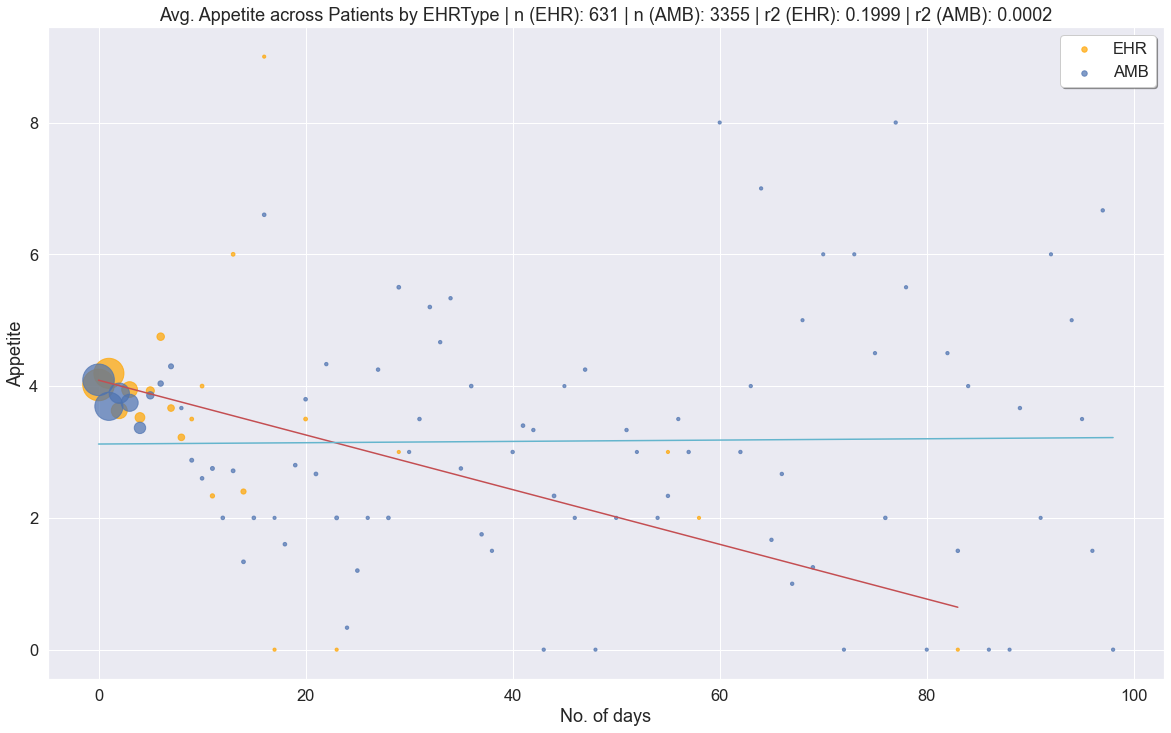

In [27]:
fig, ax = plt.subplots()
x_ehr = df_a3[df_a3['EHRType'] == 'EHR']['hos_days']
y_ehr = df_a3[df_a3['EHRType'] == 'EHR']['appetite']['mean']
slope, intercept, r_value_ehr, p_value, std_err = stats.linregress(x_ehr,y_ehr)
l1 = ax.scatter(x_ehr, y_ehr, color='orange', s=get_scatter_marker_size(df_a3[df_a3['EHRType'] == 'EHR']['IDEHR']['count']), alpha=0.7)
ax.plot(x_ehr, slope*x_ehr + intercept, color='r')
x_amb = df_a3[df_a3['EHRType'] == 'AMB']['hos_days']
y_amb = df_a3[df_a3['EHRType'] == 'AMB']['appetite']['mean']
slope, intercept, r_value_amb, p_value, std_err = stats.linregress(x_amb,y_amb)
l2 = ax.scatter(x_amb, y_amb, color='b', s=get_scatter_marker_size(df_a3[df_a3['EHRType'] == 'AMB']['IDEHR']['count']), alpha=0.7)
ax.plot(x_amb, slope*x_amb + intercept, color='c')
lgnd = ax.legend((l1, l2), ('EHR', 'AMB'), loc='best', shadow=True, facecolor='w')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set_title('Avg. Appetite across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | r2 (EHR): ' + "{:.4f}".format(r_value_ehr ** 2) + " | r2 (AMB): " + "{:.4f}".format(r_value_amb ** 2))
plt.savefig('./graphs/gi/app_avg_ehr.png', bbox_inches='tight')
plt.show()

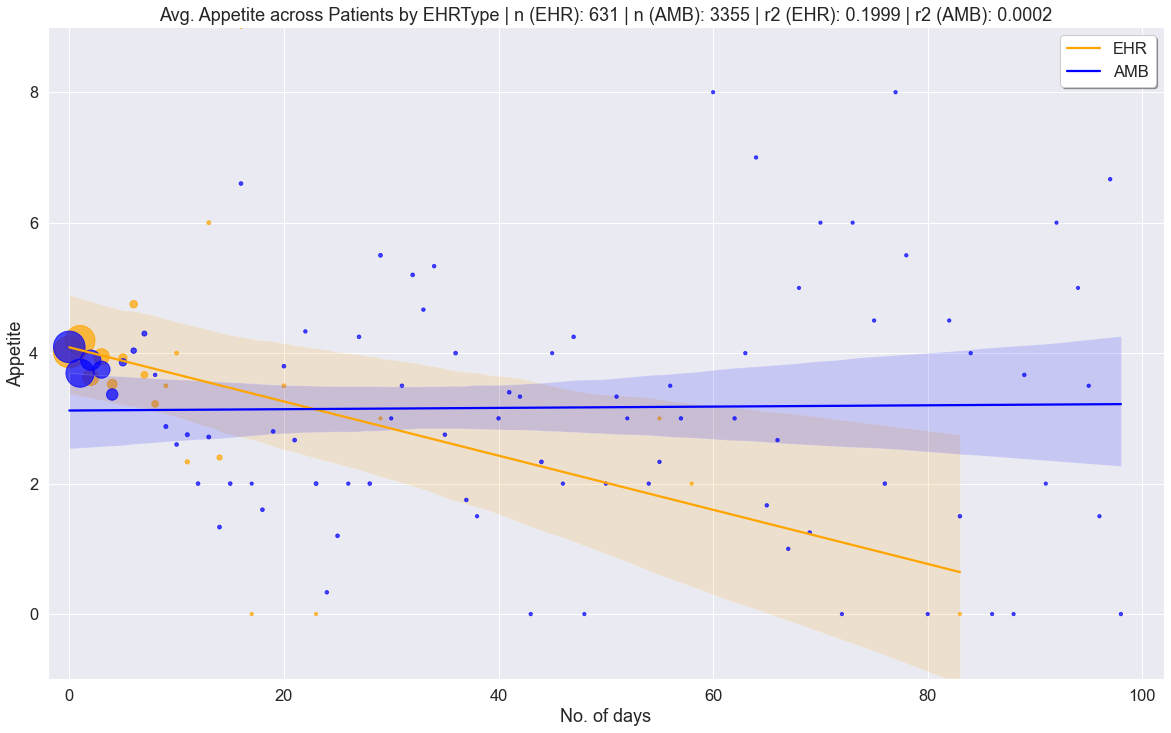

In [28]:
fig, ax = plt.subplots()
x_ehr = df_a3[df_a3['EHRType'] == 'EHR']['hos_days']
y_ehr = df_a3[df_a3['EHRType'] == 'EHR']['appetite']['mean']
slope, intercept, r_value_ehr, p_value, std_err = stats.linregress(x_ehr,y_ehr)
# l1 = ax.scatter(x_ehr, y_ehr, color='orange', s=get_scatter_marker_size(df_a3[df_a3['EHRType'] == 'EHR']['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x_ehr, y=y_ehr, color='orange', ax=ax, scatter_kws={'s':get_scatter_marker_size(df_a3[df_a3['EHRType'] == 'EHR']['IDEHR']['count']), 'alpha': 0.7})
x_amb = df_a3[df_a3['EHRType'] == 'AMB']['hos_days']
y_amb = df_a3[df_a3['EHRType'] == 'AMB']['appetite']['mean']
slope, intercept, r_value_amb, p_value, std_err = stats.linregress(x_amb,y_amb)
# l2 = ax.scatter(x_amb, y_amb, color='b', s=get_scatter_marker_size(df_a3[df_a3['EHRType'] == 'AMB']['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x_amb, y=y_amb, color='blue', ax=ax, scatter_kws={'s':get_scatter_marker_size(df_a3[df_a3['EHRType'] == 'AMB']['IDEHR']['count']), 'alpha': 0.7})
lgnd = ax.legend(('EHR', 'AMB'), loc='best', shadow=True, facecolor='w')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
ax.set(ylim=(-1, 9), xlim=(-2, 102))
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set_title('Avg. Appetite across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | r2 (EHR): ' + "{:.4f}".format(r_value_ehr ** 2) + " | r2 (AMB): " + "{:.4f}".format(r_value_amb ** 2))
plt.savefig('./graphs/gi/app_avg_ehr_sns.png', bbox_inches='tight')
plt.show()

In [29]:
# appetite split by setting
print(len(df_aa.IDEHR.unique()))
df_set = pd.read_excel('./vidas_data/IDEHR-EHRType-OU.xlsx')
df_set = df_set.rename(columns={"UO (Setting)\n": 'Setting'})
df_st = pd.merge(df_aa, df_set, on=['IDEHR', 'EHRType'])
print(len(df_st.IDEHR.unique()))
df_st

3960
3960


,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,appetite,hos_days,PatientID,Setting
0,1489,2015-12-27 03:00:00,AMB,2015-04-21 03:36:25.613,249.0,Palliative (Non-Malignant),586,2015-12-10 12:31:32.910,0.0,233,192,Domicilio
1,1760,2016-01-12 07:30:00,AMB,2015-04-16 21:20:34.270,270.0,Palliative (Non-Malignant),1,2015-04-21 19:28:37.870,1.0,4,284,Domicilio
2,1994,2016-07-09 20:00:00,AMB,2015-04-15 22:42:22.550,450.0,Cervical-Ovarian,1830,2015-11-27 20:13:44.800,1.0,225,20379,Domicilio
3,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-01 13:46:03.970,2.0,28,30711,Domicilio
4,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-08 14:46:07.657,2.0,35,30711,Domicilio
...,...,...,...,...,...,...,...,...,...,...,...,...
4403,29398,2020-07-21 19:30:57,AMB,2020-07-17 09:37:05.790,4.0,Breast,1749,2020-07-21 11:54:38.257,4.0,4,59879,Domicilio
4404,29399,2020-07-23 00:00:21,AMB,2020-07-17 10:08:54.310,5.0,Lung,1630,2020-07-20 12:47:13.370,4.0,3,59878,Domicilio
4405,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 19:00:04.973,1.0,0,59898,Domicilio
4406,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-22 18:09:50.193,1.0,5,59898,Domicilio


In [30]:
df_a4 = df_st[['IDEHR', 'Setting', 'hos_days', 'appetite']].groupby(by=['Setting', 'hos_days']).agg(['mean', 'count']).reset_index()
df_st[['Setting', 'survival_time_days', 'hos_days']].groupby(by=['Setting']).agg({'survival_time_days': [np.min, np.max, np.mean], 'hos_days': [np.min, np.max, np.mean]})

survival_time_days                    hos_days       \
                                   amin    amax       mean     amin amax   
Setting                                                                    
Domicilio                           0.0  1416.0  61.517324        0  966   
Domicilio Pediatrico                3.0   165.0  71.000000        1   31   
Hospice                             0.0   135.0  15.016949        0   83   
Hospice Pediatrico                 23.0    23.0  23.000000        1    1   

                                 
                           mean  
Setting                          
Domicilio             14.112207  
Domicilio Pediatrico   8.333333  
Hospice                2.078582  
Hospice Pediatrico     1.000000

In [31]:
df_a4[df_a4['Setting'] == 'Hospice Pediatrico'] = np.nan
df_a4[df_a4['Setting'] == 'Domicilio Pediatrico'] = np.nan
df_a4 = df_a4.dropna()

In [32]:
d_num = len(df_st[df_st['Setting'] == 'Domicilio'].IDEHR.unique())
dp_num = len(df_st[df_st['Setting'] == 'Domicilio Pediatrico'].IDEHR.unique())
h_num = len(df_st[df_st['Setting'] == 'Hospice'].IDEHR.unique())
hp_num = len(df_st[df_st['Setting'] == 'Hospice Pediatrico'].IDEHR.unique())
# sns.lmplot(x='hos_days', y='appetite', hue='Setting', data=df_a4, order=1, height=10, aspect=1.8).fig.suptitle('Avg. Appetite across Patients by Setting | n (D): ' + str(d_num) + ' | n (H): ' + str(h_num) + ' | order: 1')

In [33]:
df_a5 = df_a4[df_a4['hos_days'] <= 100]
# sns.lmplot(x='hos_days', y='appetite', hue='Setting', data=df_a5, order=1, height=10, aspect=1.8).fig.suptitle('Avg. Appetite across Patients by Setting | n (D): ' + str(d_num) + ' | n (H): ' + str(h_num) + ' | order: 1')

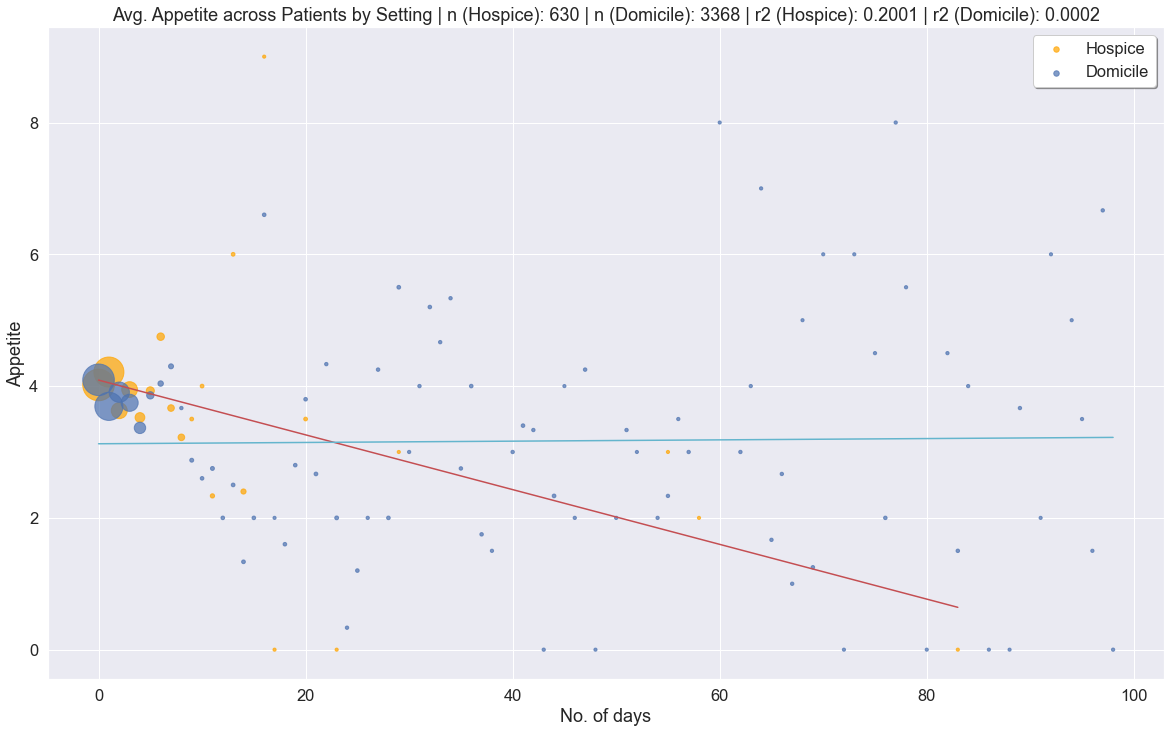

In [34]:
fig, ax = plt.subplots()
x_hos = df_a5[df_a5['Setting'] == 'Hospice']['hos_days']
y_hos = df_a5[df_a5['Setting'] == 'Hospice']['appetite']['mean']
slope, intercept, r_value_hos, p_value, std_err = stats.linregress(x_hos,y_hos)
l1 = ax.scatter(x_hos, y_hos, color='orange', s=get_scatter_marker_size(df_a5[df_a5['Setting'] == 'Hospice']['IDEHR']['count']), alpha=0.7)
ax.plot(x_hos, slope*x_hos + intercept, color='r')
x_dom = df_a5[df_a5['Setting'] == 'Domicilio']['hos_days']
y_dom = df_a5[df_a5['Setting'] == 'Domicilio']['appetite']['mean']
slope, intercept, r_value_dom, p_value, std_err = stats.linregress(x_dom,y_dom)
l2 = ax.scatter(x_dom, y_dom, color='b', s=get_scatter_marker_size(df_a5[df_a5['Setting'] == 'Domicilio']['IDEHR']['count']), alpha=0.7)
ax.plot(x_dom, slope*x_dom + intercept, color='c')
lgnd = ax.legend((l1, l2), ('Hospice', 'Domicile'), loc='best', shadow=True, facecolor='w')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set_title('Avg. Appetite across Patients by Setting | n (Hospice): ' + str(h_num) + ' | n (Domicile): ' + str(d_num) + ' | r2 (Hospice): ' + "{:.4f}".format(r_value_hos ** 2) + " | r2 (Domicile): " + "{:.4f}".format(r_value_dom ** 2))
plt.savefig('./graphs/gi/app_avg_set.png', bbox_inches='tight')
plt.show()

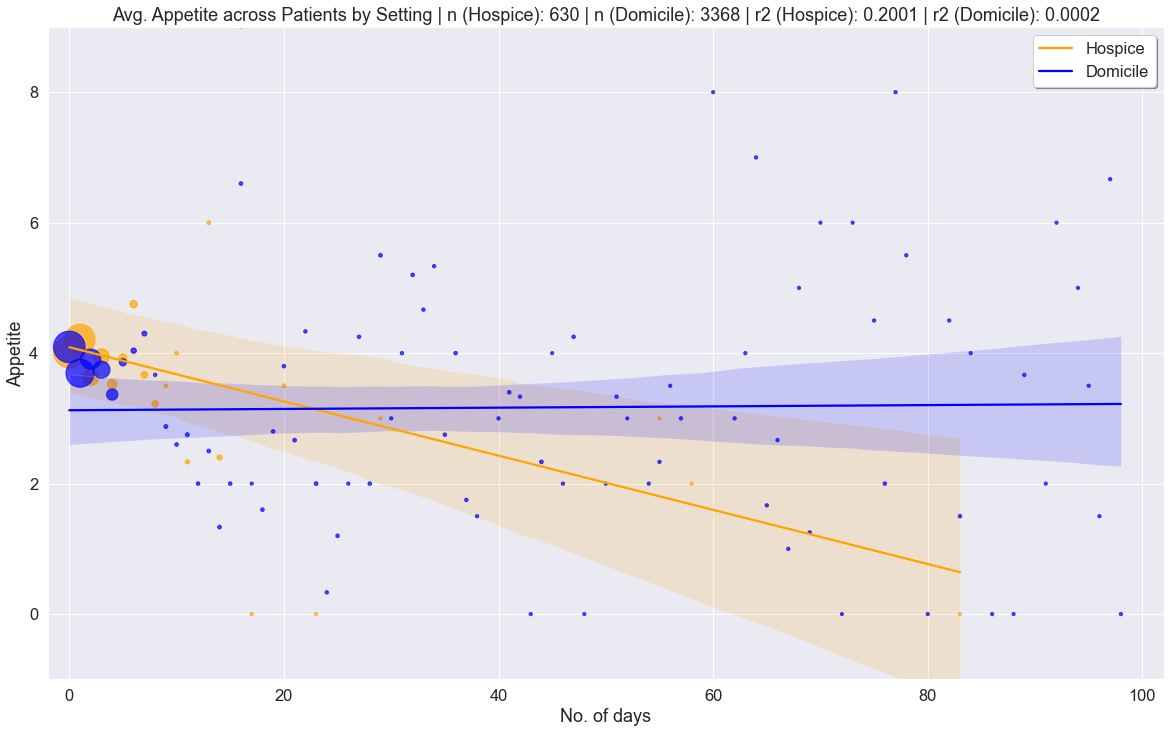

In [35]:
fig, ax = plt.subplots()
x_hos = df_a5[df_a5['Setting'] == 'Hospice']['hos_days']
y_hos = df_a5[df_a5['Setting'] == 'Hospice']['appetite']['mean']
slope, intercept, r_value_hos, p_value, std_err = stats.linregress(x_hos,y_hos)
# l1 = ax.scatter(x_hos, y_hos, color='orange', s=get_scatter_marker_size(df_a5[df_a5['Setting'] == 'Hospice']['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x_hos, y=y_hos, color='orange', ax=ax, scatter_kws={'s':get_scatter_marker_size(df_a5[df_a5['Setting'] == 'Hospice']['IDEHR']['count']), 'alpha':0.7})
x_dom = df_a5[df_a5['Setting'] == 'Domicilio']['hos_days']
y_dom = df_a5[df_a5['Setting'] == 'Domicilio']['appetite']['mean']
slope, intercept, r_value_dom, p_value, std_err = stats.linregress(x_dom,y_dom)
# l2 = ax.scatter(x_dom, y_dom, color='b', s=get_scatter_marker_size(df_a5[df_a5['Setting'] == 'Domicilio']['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x_dom, y=y_dom, color='blue', scatter_kws={'s':get_scatter_marker_size(df_a5[df_a5['Setting'] == 'Domicilio']['IDEHR']['count']), 'alpha':0.7})
lgnd = ax.legend(('Hospice', 'Domicile'), loc='best', shadow=True, facecolor='w')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
ax.set(xlim=(-2, 102), ylim=(-1,9))
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set_title('Avg. Appetite across Patients by Setting | n (Hospice): ' + str(h_num) + ' | n (Domicile): ' + str(d_num) + ' | r2 (Hospice): ' + "{:.4f}".format(r_value_hos ** 2) + " | r2 (Domicile): " + "{:.4f}".format(r_value_dom ** 2))
plt.savefig('./graphs/gi/app_avg_set_sns.png', bbox_inches='tight')
plt.show()

In [36]:
# append the number of patients to each diagnosis name
d_label = df_aa[df_aa['hos_days'] <= 100][['IDEHR', 'Diagnosis']].drop_duplicates()['Diagnosis'].value_counts()
df_a6 = df_aa[['Diagnosis', 'hos_days', 'appetite']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_a6 = df_a6[df_a6['hos_days'] <= 100]
df_a6['Diagnosis'] = df_a6['Diagnosis'].apply(lambda x: np.nan if isinstance(x, float) else x + ' (n: ' + str(d_label[x]) + ')')
d_label

Lung                               842
GI Tract                           675
Pancreas                           419
Palliative (Non-Malignant)         358
Breast                             285
Liver-Biliary                      283
Genitourinary                      208
Cervical-Ovarian                   191
Prostate                           151
Brain-Snc                          143
Lymphoma                           111
Head-Neck                           76
Sarcoma                             72
Myeloid Leukemia                    57
Skin                                48
Palliative (Cancer-Unspecified)     37
Lymphoid_Leukemia                   17
Thyroid                              9
Name: Diagnosis, dtype: int64

In [37]:
print(df_aa[df_aa['hos_days'] <= 100][['IDEHR', 'Diagnosis']].groupby(by=['Diagnosis']).nunique().stack().sum())
df_aa[df_aa['hos_days'] <= 100][['IDEHR', 'Diagnosis']].groupby(by=['Diagnosis']).nunique().stack()

3982


Diagnosis                             
Brain-Snc                        IDEHR    143
Breast                           IDEHR    285
Cervical-Ovarian                 IDEHR    191
GI Tract                         IDEHR    675
Genitourinary                    IDEHR    208
Head-Neck                        IDEHR     76
Liver-Biliary                    IDEHR    283
Lung                             IDEHR    842
Lymphoid_Leukemia                IDEHR     17
Lymphoma                         IDEHR    111
Myeloid Leukemia                 IDEHR     57
Palliative (Cancer-Unspecified)  IDEHR     37
Palliative (Non-Malignant)       IDEHR    358
Pancreas                         IDEHR    419
Prostate                         IDEHR    151
Sarcoma                          IDEHR     72
Skin                             IDEHR     48
Thyroid                          IDEHR      9
dtype: int64

In [38]:
# average appetite across Diagnosis
d_label = df_aa[df_aa['hos_days'] <= 100][['IDEHR', 'Diagnosis']].drop_duplicates()['Diagnosis'].value_counts()
df_a6 = df_aa[['Diagnosis', 'hos_days', 'appetite']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_a6 = df_a6[df_a6['hos_days'] <= 100]
df_a6['Diagnosis'] = df_a6['Diagnosis'].apply(lambda x: np.nan if isinstance(x, float) else x + ' (n: ' + str(d_label[x]) + ')')
p_num = d_label.sum()
df_a6 = df_a6.pivot(index='Diagnosis', columns='hos_days', values='appetite')
df_a6

hos_days,0,1,2,3,4,5,6,7,8,9,...,86,88,89,91,92,94,95,96,97,98
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc (n: 143),2.215686,1.822222,1.777778,2.600000,1.111111,1.666667,3.000000,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breast (n: 285),3.415254,3.987179,3.000000,3.566667,3.307692,3.285714,4.333333,2.000000,1.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cervical-Ovarian (n: 191),4.000000,3.307692,4.233333,3.296296,3.928571,3.666667,NaN,8.000000,6.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
GI Tract (n: 675),4.584746,4.545455,3.909091,4.469880,3.848485,4.416667,4.333333,3.500000,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,7.0,0.0
Genitourinary (n: 208),4.096386,2.920635,3.724138,2.428571,2.272727,3.000000,8.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
Head-Neck (n: 76),3.285714,3.115385,3.909091,4.750000,5.333333,8.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
Liver-Biliary (n: 283),4.194444,4.333333,4.342857,4.120000,4.333333,5.250000,3.000000,4.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
Lung (n: 842),3.633987,3.417293,3.727273,3.517647,2.620690,4.000000,4.200000,3.285714,2.0,1.0,...,0.0,NaN,NaN,2.0,NaN,5.0,2.0,NaN,NaN,NaN
Lymphoid_Leukemia (n: 17),4.500000,3.500000,2.000000,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


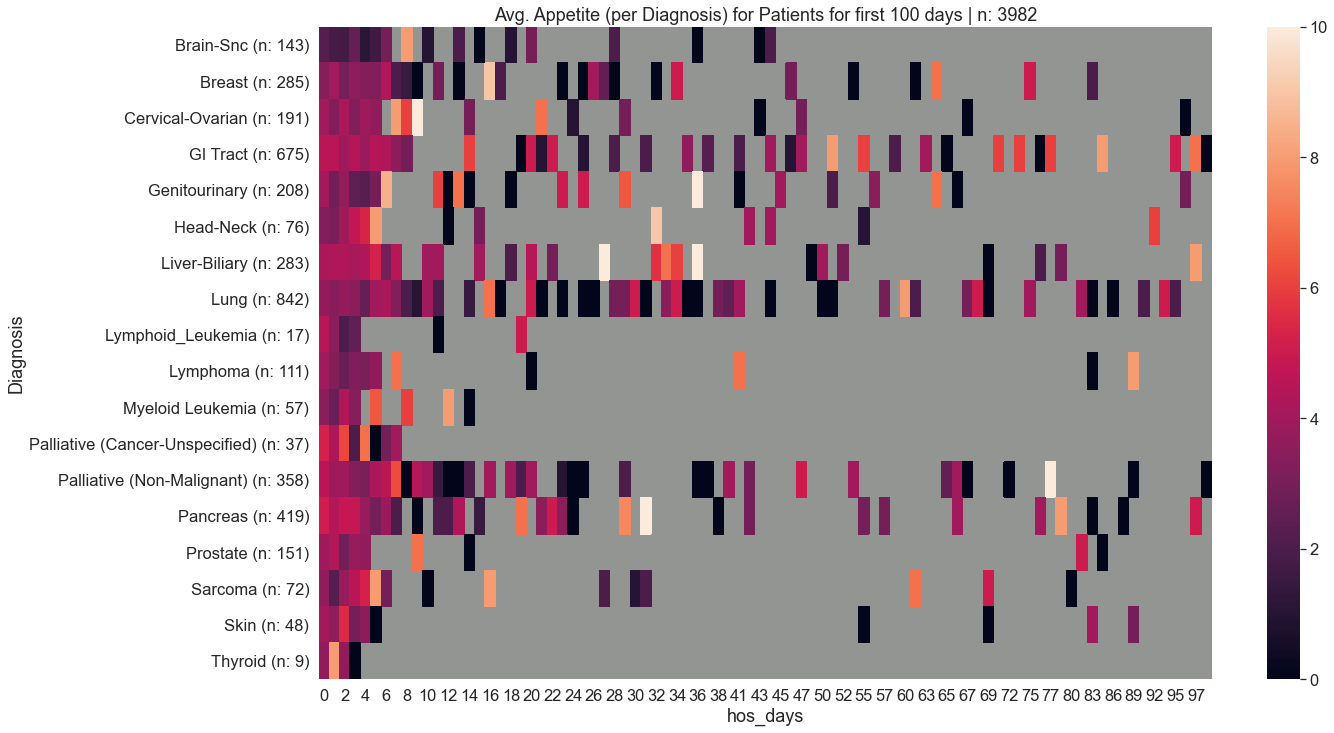

In [39]:
ax = plt.axes()
sns.heatmap(df_a6, annot=False, fmt='g', ax=ax)
ax.set_facecolor('xkcd:gray')
ax.set_title('Avg. Appetite (per Diagnosis) for Patients for first 100 days | n: ' + str(p_num))
plt.savefig('./graphs/gi/app_avg_heatmap.png', bbox_inches='tight')
plt.show()

In [40]:
d_label = df_aa[df_aa['hos_days'] <= 15][['IDEHR', 'Diagnosis']].drop_duplicates()['Diagnosis'].value_counts()
df_a6 = df_aa[['Diagnosis', 'hos_days', 'appetite']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_a6 = df_a6[df_a6['hos_days'] <= 15]
df_a6['Diagnosis'] = df_a6['Diagnosis'].apply(lambda x: np.nan if isinstance(x, float) else x + ' (n: ' + str(d_label[x]) + ')')
p_num = d_label.sum()
df_a6 = df_a6.pivot(index='Diagnosis', columns='hos_days', values='appetite')
df_a6

hos_days,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Diagnosis,,,,,,,,,,,,,,,,
Brain-Snc (n: 142),2.215686,1.822222,1.777778,2.600000,1.111111,1.666667,3.000000,NaN,8.0,NaN,1.0,NaN,NaN,2.000000,NaN,0.0
Breast (n: 281),3.415254,3.987179,3.000000,3.566667,3.307692,3.285714,4.333333,2.000000,1.5,0.0,NaN,3.0,NaN,0.000000,NaN,NaN
Cervical-Ovarian (n: 189),4.000000,3.307692,4.233333,3.296296,3.928571,3.666667,NaN,8.000000,6.0,10.0,NaN,NaN,NaN,NaN,3.0,NaN
GI Tract (n: 668),4.584746,4.545455,3.909091,4.469880,3.848485,4.416667,4.333333,3.500000,3.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN
Genitourinary (n: 206),4.096386,2.920635,3.724138,2.428571,2.272727,3.000000,8.500000,NaN,NaN,NaN,NaN,6.0,0.0,7.000000,0.0,NaN
Head-Neck (n: 75),3.285714,3.115385,3.909091,4.750000,5.333333,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0
Liver-Biliary (n: 281),4.194444,4.333333,4.342857,4.120000,4.333333,5.250000,3.000000,4.500000,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0
Lung (n: 836),3.633987,3.417293,3.727273,3.517647,2.620690,4.000000,4.200000,3.285714,2.0,1.0,4.0,2.0,NaN,NaN,1.5,NaN
Lymphoid_Leukemia (n: 17),4.500000,3.500000,2.000000,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


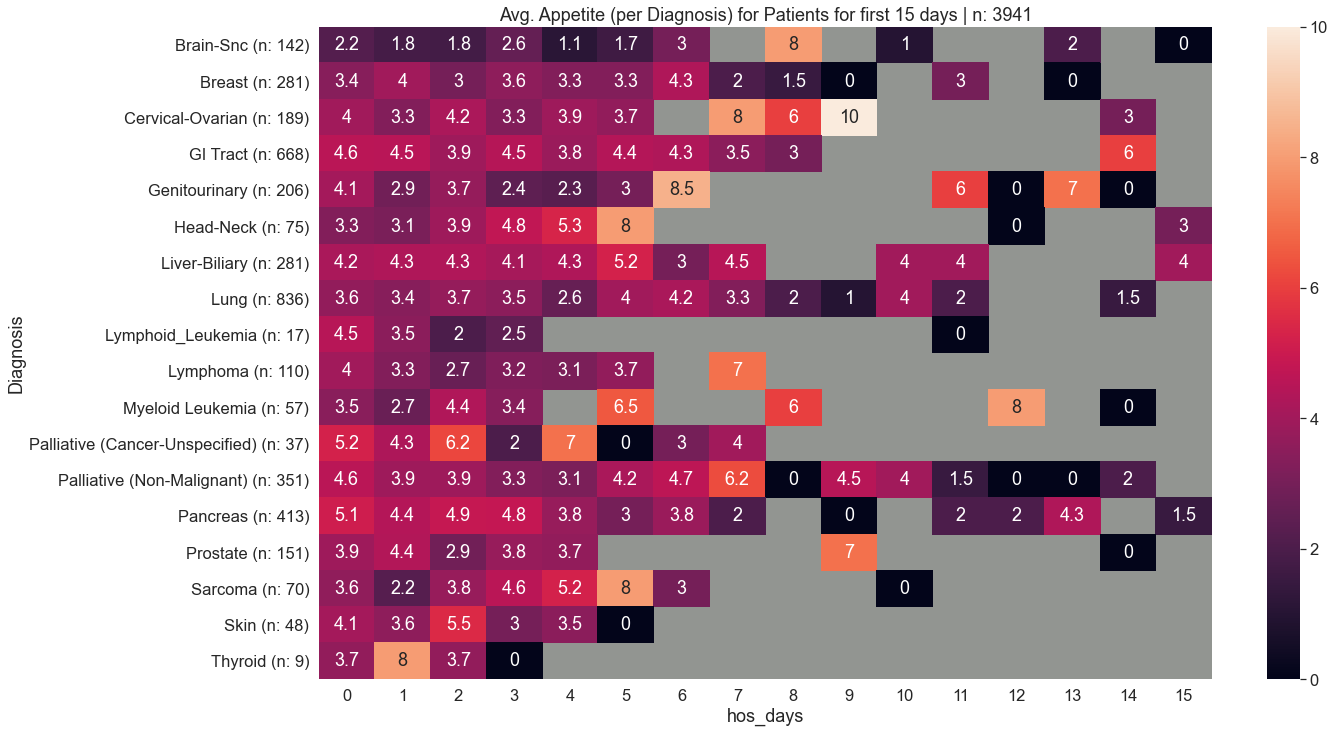

In [41]:
ax = plt.axes()
sns.heatmap(df_a6, annot=True, fmt='.2g', ax=ax)
ax.set_facecolor('xkcd:gray')
ax.set_title('Avg. Appetite (per Diagnosis) for Patients for first 15 days | n: ' + str(p_num))
plt.savefig('./graphs/gi/app_avg_heatmap_f15.png', bbox_inches='tight')
plt.show()

In [42]:
s_time = 15
df_a6 = df_aa[df_aa['survival_time_days'] >= s_time ]
df_a6 = df_a6[df_a6['hos_days'] <= s_time]
d_label = df_a6[df_a6['hos_days'] <= s_time][['IDEHR', 'Diagnosis']].groupby(by=['Diagnosis']).nunique().stack()
p_num = d_label.sum()
df_a6 = df_a6[['Diagnosis', 'hos_days', 'appetite']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_a6 = df_a6[df_a6['hos_days'] <= s_time]
df_a6['Diagnosis'] = df_a6['Diagnosis'].apply(lambda x: np.nan if isinstance(x, float) else x + ' (n: ' + str(d_label[x][0]) + ')')
df_a6 = df_a6.pivot(index='Diagnosis', columns='hos_days', values='appetite')
df_a6

hos_days,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Diagnosis,,,,,,,,,,,,,,,,
Brain-Snc (n: 108),1.162162,1.129032,1.882353,1.400000,1.111111,1.666667,3.000000,NaN,NaN,NaN,1.0,NaN,NaN,2.000000,NaN,0.0
Breast (n: 165),2.646154,3.847826,2.952381,2.937500,3.100000,2.400000,5.500000,2.0,3.0,0.000000,NaN,3.0,NaN,0.000000,NaN,NaN
Cervical-Ovarian (n: 114),3.242424,2.413793,4.055556,2.863636,2.555556,4.000000,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
GI Tract (n: 412),3.729927,3.931034,3.666667,3.982143,3.400000,4.090909,3.600000,3.5,1.5,NaN,NaN,NaN,NaN,NaN,6.0,NaN
Genitourinary (n: 132),3.063830,2.725000,2.833333,2.461538,1.800000,3.250000,NaN,NaN,NaN,NaN,NaN,6.0,0.0,7.000000,0.0,NaN
Head-Neck (n: 48),2.785714,3.312500,3.909091,2.600000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0
Liver-Biliary (n: 155),3.137931,3.755556,3.142857,4.142857,4.750000,5.200000,3.000000,3.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0
Lung (n: 496),3.012346,2.961538,3.202247,2.750000,2.315789,2.857143,3.500000,1.5,2.0,0.666667,4.0,2.0,NaN,NaN,1.5,NaN
Lymphoid_Leukemia (n: 7),0.000000,1.333333,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


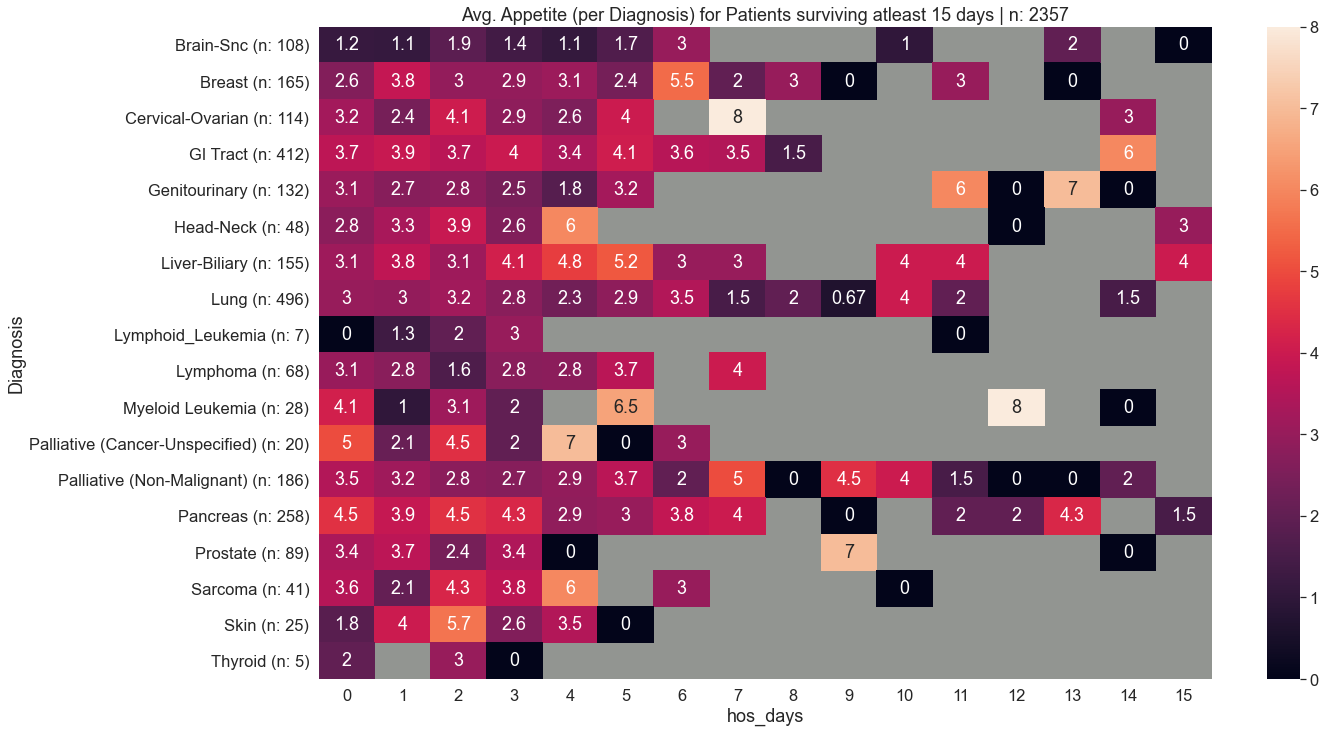

In [43]:
ax = plt.axes()
sns.heatmap(df_a6, annot=True, fmt='.2g', ax=ax)
ax.set_facecolor('xkcd:gray')
ax.set_title('Avg. Appetite (per Diagnosis) for Patients surviving atleast 15 days | n: ' + str(p_num))
plt.savefig('./graphs/gi/app_avg_heatmap_a15.png', bbox_inches='tight')
plt.show()

## Appetite (Min.) ##

In [44]:
# appetite regression plots
df_a1 = df_aa[['IDEHR', 'hos_days', 'appetite']].groupby(by=['hos_days']).agg(['min', 'count']).reset_index()
df_a1

hos_days IDEHR       appetite      
               min count      min count
0          0  2970  1479      0.0  1479
1          1  2981  1198      0.0  1198
2          2  2990   568      0.0   568
3          3  2968   416      0.0   416
4          4  1760   174      0.0   174
..       ...   ...   ...      ...   ...
198      689  5384     1      6.0     1
199      776  5770     1      2.0     1
200      782  4893     1      5.0     1
201      961  6762     1      0.0     1
202      966  6762     1      0.0     1

[203 rows x 5 columns]

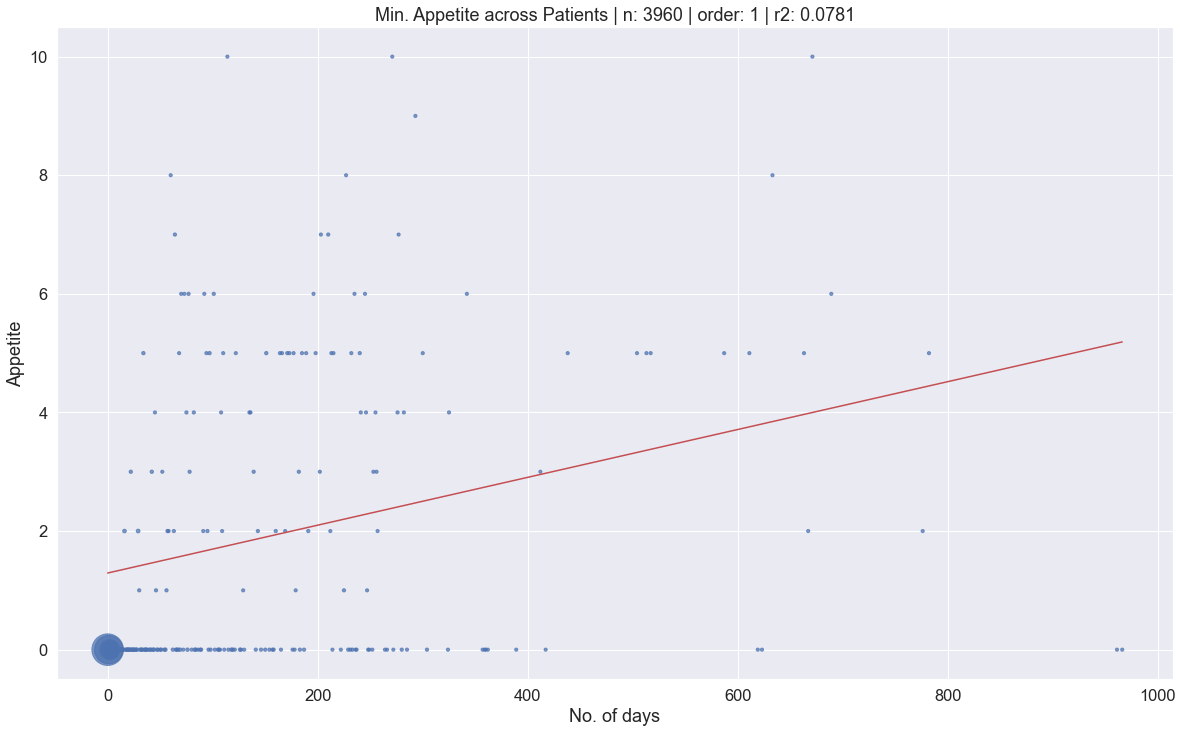

In [45]:
fig, ax = plt.subplots()
x = df_a1['hos_days']
y = df_a1['appetite']['min']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax.scatter(x, y, s=get_scatter_marker_size(df_a1['IDEHR']['count']), alpha=0.7)
ax.plot(x, slope*x + intercept, color='r')
ax.set_title('Min. Appetite across Patients | n: ' + str(len(df_aa.IDEHR.unique())) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
plt.savefig('./graphs/gi/app_min.png', bbox_inches='tight')
plt.show()

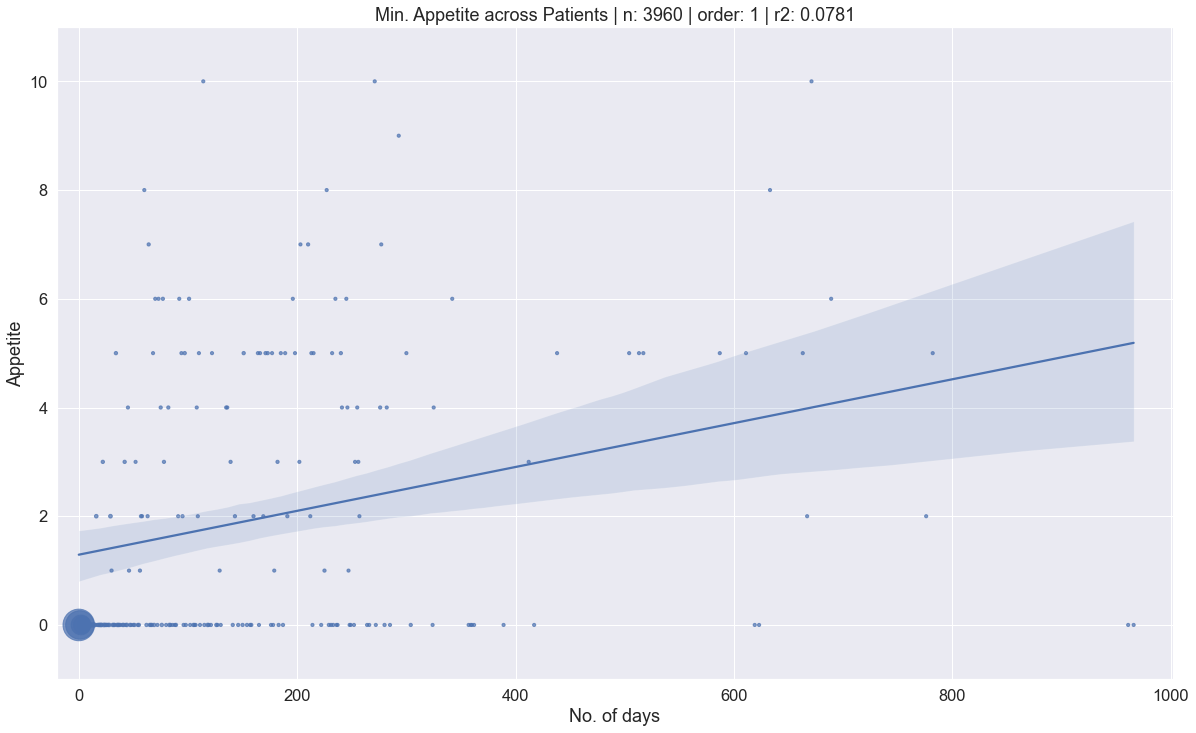

In [46]:
fig, ax = plt.subplots()
x = df_a1['hos_days']
y = df_a1['appetite']['min']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# ax.scatter(x, y, s=get_scatter_marker_size(df_a1['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x, y=y, color='b', scatter_kws={'s':get_scatter_marker_size(df_a1['IDEHR']['count']), 'alpha': 0.7})
ax.set_title('Min. Appetite across Patients | n: ' + str(len(df_aa.IDEHR.unique())) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set(xlim=(-20, 1002), ylim=(-1, 11))
plt.savefig('./graphs/gi/app_min_sns.png', bbox_inches='tight')
plt.show()

In [47]:
# appetite of patients surviving atleast x days
s_time = 60
df_a2 = df_aa[df_aa['survival_time_days'] >= s_time]
df_a2 = df_a2[df_a2['hos_days'] <= s_time]
p_num = len(df_a2.IDEHR.unique())
df_a2 = df_a2[['IDEHR', 'hos_days', 'appetite']].groupby(by=['hos_days']).agg(['min', 'count']).reset_index()

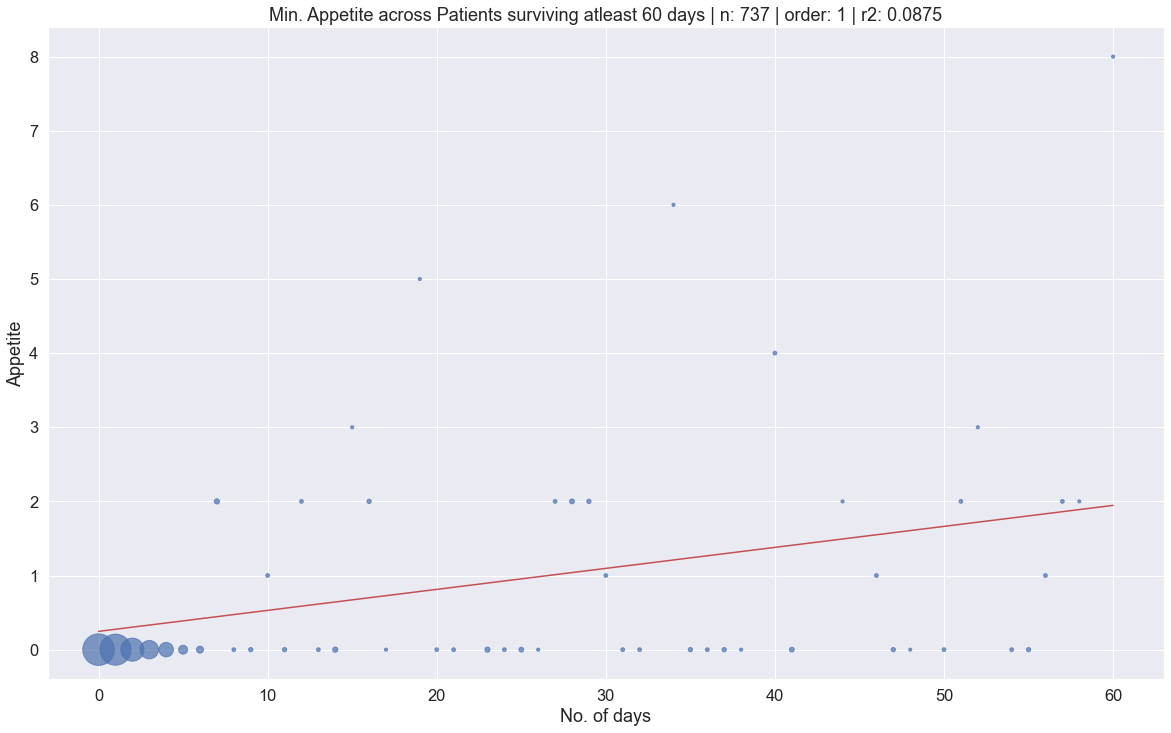

In [48]:
fig, ax = plt.subplots()
x = df_a2['hos_days']
y = df_a2['appetite']['min']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax.scatter(x, y, s=get_scatter_marker_size(df_a2['IDEHR']['count']), alpha=0.7)
ax.plot(x, slope*x + intercept, color='r')
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set_title('Min. Appetite across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
plt.savefig('./graphs/gi/app_min_a60.png', bbox_inches='tight')
plt.show()

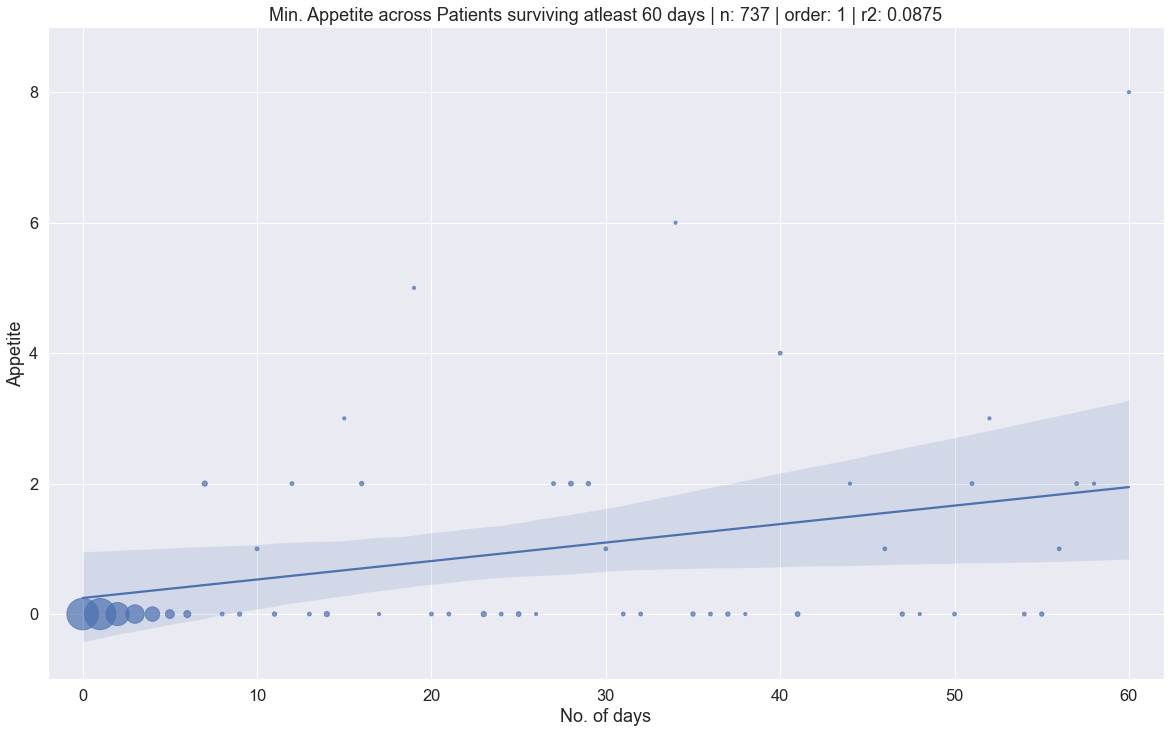

In [49]:
fig, ax = plt.subplots()
x = df_a2['hos_days']
y = df_a2['appetite']['min']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# ax.scatter(x, y, s=get_scatter_marker_size(df_a2['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x, y=y, color='b', ax=ax, scatter_kws={'s':get_scatter_marker_size(df_a2['IDEHR']['count']), 'alpha':0.7})
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set(xlim=(-2, 62), ylim=(-1,9))
ax.set_title('Min. Appetite across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
plt.savefig('./graphs/gi/app_min_a60_sns.png', bbox_inches='tight')
plt.show()

In [50]:
# appetite split by EHRType
df_a3 = df_aa[['IDEHR', 'hos_days', 'EHRType', 'appetite']].groupby(by=['EHRType', 'hos_days']).agg(['min', 'count']).reset_index()
df_a3

EHRType hos_days IDEHR       appetite      
                       min count      min count
0       AMB        0  3428  1245      0.0  1245
1       AMB        1  3495   986      0.0   986
2       AMB        2  3503   509      0.0   509
3       AMB        3  5041   359      0.0   359
4       AMB        4  1760   153      0.0   153
..      ...      ...   ...   ...      ...   ...
219     EHR       23  3108     1      0.0     1
220     EHR       29  4863     1      3.0     1
221     EHR       55  3506     1      3.0     1
222     EHR       58  3138     1      2.0     1
223     EHR       83  5119     1      0.0     1

[224 rows x 6 columns]

In [51]:
e_num = len(df_aa[df_aa['EHRType'] == 'EHR'].IDEHR.unique())
a_num = len(df_aa[df_aa['EHRType'] == 'AMB'].IDEHR.unique())
df_a3 = df_a3[df_a3['hos_days'] <= 100]

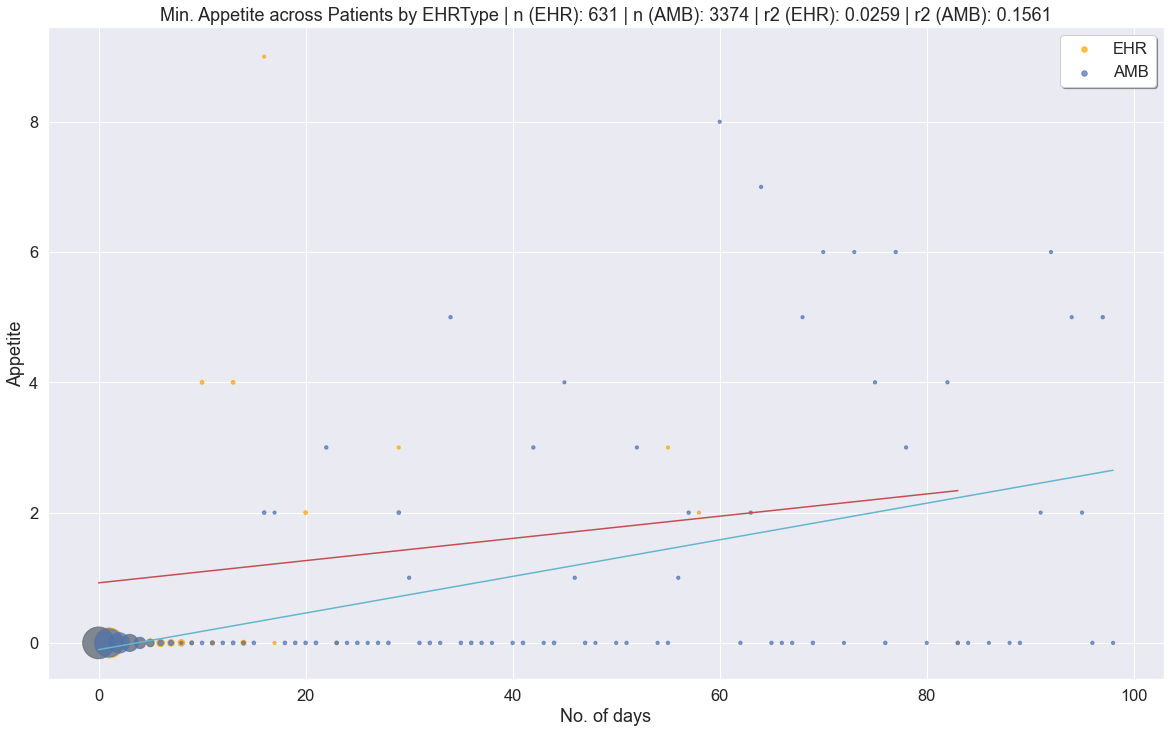

In [52]:
fig, ax = plt.subplots()
x_ehr = df_a3[df_a3['EHRType'] == 'EHR']['hos_days']
y_ehr = df_a3[df_a3['EHRType'] == 'EHR']['appetite']['min']
slope, intercept, r_value_ehr, p_value, std_err = stats.linregress(x_ehr,y_ehr)
l1 = ax.scatter(x_ehr, y_ehr, color='orange', s=get_scatter_marker_size(df_a3[df_a3['EHRType'] == 'EHR']['IDEHR']['count']), alpha=0.7)
ax.plot(x_ehr, slope*x_ehr + intercept, color='r')
x_amb = df_a3[df_a3['EHRType'] == 'AMB']['hos_days']
y_amb = df_a3[df_a3['EHRType'] == 'AMB']['appetite']['min']
slope, intercept, r_value_amb, p_value, std_err = stats.linregress(x_amb,y_amb)
l2 = ax.scatter(x_amb, y_amb, color='b', s=get_scatter_marker_size(df_a3[df_a3['EHRType'] == 'AMB']['IDEHR']['count']), alpha=0.7)
ax.plot(x_amb, slope*x_amb + intercept, color='c')
lgnd = ax.legend((l1, l2), ('EHR', 'AMB'), loc='best', shadow=True, facecolor='w')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set_title('Min. Appetite across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | r2 (EHR): ' + "{:.4f}".format(r_value_ehr ** 2) + " | r2 (AMB): " + "{:.4f}".format(r_value_amb ** 2))
plt.savefig('./graphs/gi/app_min_ehr.png', bbox_inches='tight')
plt.show()

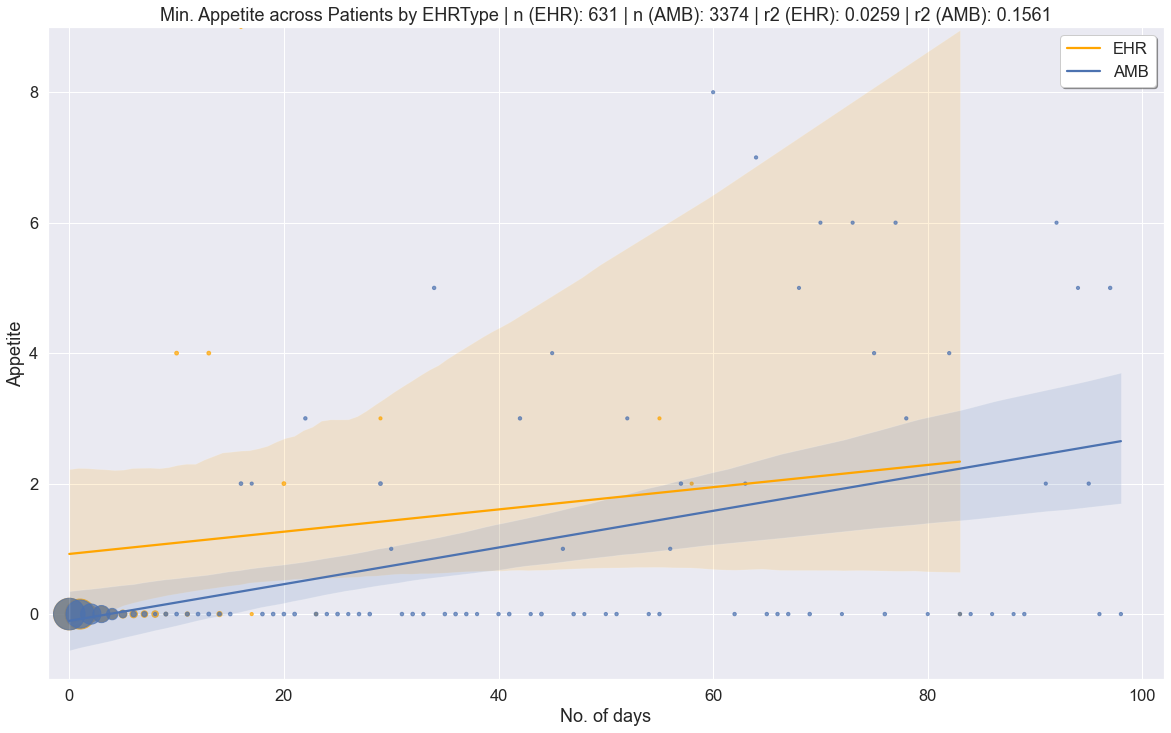

In [53]:
fig, ax = plt.subplots()
x_ehr = df_a3[df_a3['EHRType'] == 'EHR']['hos_days']
y_ehr = df_a3[df_a3['EHRType'] == 'EHR']['appetite']['min']
slope, intercept, r_value_ehr, p_value, std_err = stats.linregress(x_ehr,y_ehr)
# l1 = ax.scatter(x_ehr, y_ehr, color='orange', s=get_scatter_marker_size(df_a3[df_a3['EHRType'] == 'EHR']['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x_ehr, y=y_ehr, color='orange', scatter_kws={'s':get_scatter_marker_size(df_a3[df_a3['EHRType'] == 'EHR']['IDEHR']['count']), 'alpha':0.7})
x_amb = df_a3[df_a3['EHRType'] == 'AMB']['hos_days']
y_amb = df_a3[df_a3['EHRType'] == 'AMB']['appetite']['min']
slope, intercept, r_value_amb, p_value, std_err = stats.linregress(x_amb,y_amb)
# l2 = ax.scatter(x_amb, y_amb, color='b', s=get_scatter_marker_size(df_a3[df_a3['EHRType'] == 'AMB']['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x_amb, y=y_amb, color='b', scatter_kws={'s': get_scatter_marker_size(df_a3[df_a3['EHRType'] == 'AMB']['IDEHR']['count']), 'alpha':0.7})
lgnd = ax.legend(('EHR', 'AMB'), loc='best', shadow=True, facecolor='w')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
ax.set(xlim=(-2,102), ylim=(-1,9))
ax.set_xlabel('No. of days')
ax.set_ylabel('Appetite')
ax.set_title('Min. Appetite across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | r2 (EHR): ' + "{:.4f}".format(r_value_ehr ** 2) + " | r2 (AMB): " + "{:.4f}".format(r_value_amb ** 2))
plt.savefig('./graphs/gi/app_min_ehr_sns.png', bbox_inches='tight')
plt.show()

In [54]:
# min. appetite across Diagnosis
d_label = df_aa[df_aa['hos_days'] <= 100][['IDEHR', 'Diagnosis']].drop_duplicates()['Diagnosis'].value_counts()
df_a6 = df_aa[['Diagnosis', 'hos_days', 'appetite']].groupby(by=['Diagnosis', 'hos_days']).min().reset_index()
df_a6 = df_a6[df_a6['hos_days'] <= 100]
df_a6['Diagnosis'] = df_a6['Diagnosis'].apply(lambda x: np.nan if isinstance(x, float) else x + ' (n: ' + str(d_label[x]) + ')')
p_num = d_label.sum()
df_a6 = df_a6.pivot(index='Diagnosis', columns='hos_days', values='appetite')
df_a6

hos_days,0,1,2,3,4,5,6,7,8,9,...,86,88,89,91,92,94,95,96,97,98
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc (n: 143),0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breast (n: 285),0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cervical-Ovarian (n: 191),0.0,0.0,0.0,0.0,0.0,3.0,NaN,8.0,6.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
GI Tract (n: 675),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,7.0,0.0
Genitourinary (n: 208),0.0,0.0,0.0,0.0,0.0,0.0,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
Head-Neck (n: 76),0.0,0.0,0.0,0.0,4.0,8.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
Liver-Biliary (n: 283),0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
Lung (n: 842),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,NaN,NaN,2.0,NaN,5.0,2.0,NaN,NaN,NaN
Lymphoid_Leukemia (n: 17),0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


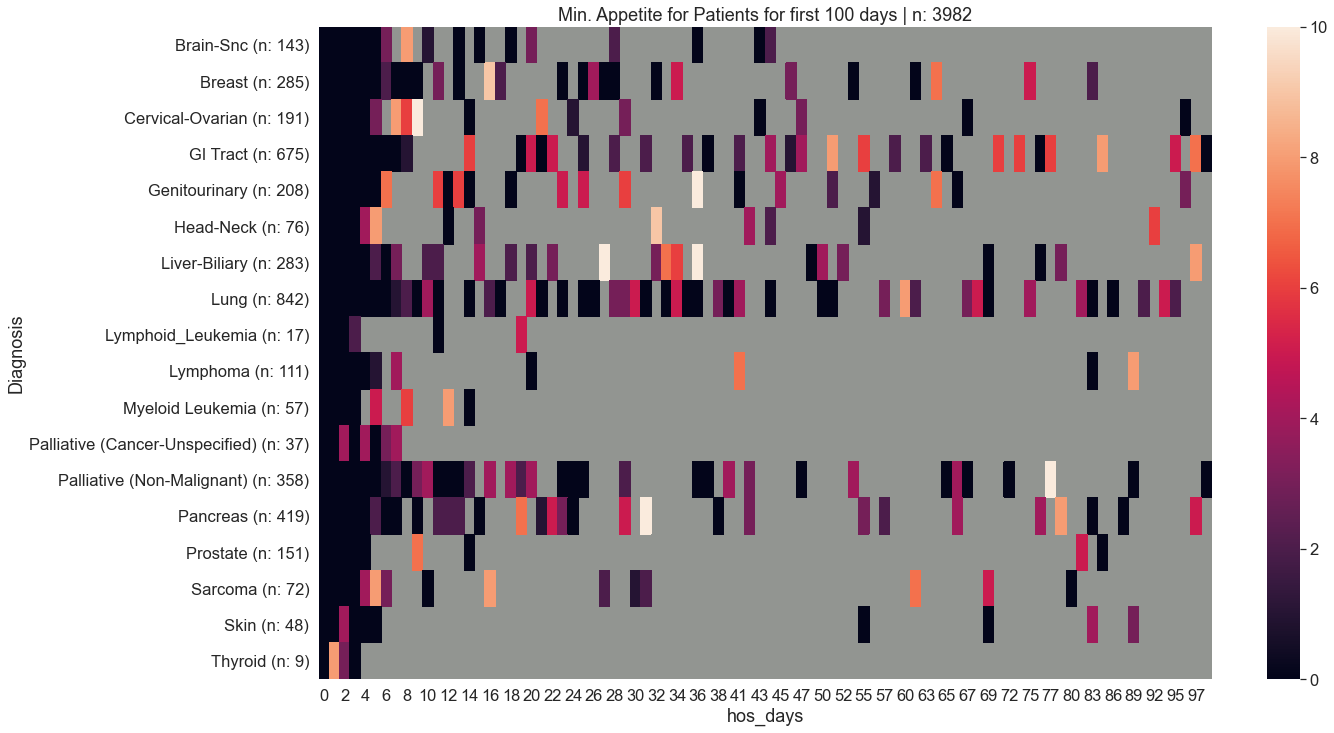

In [55]:
ax = plt.axes()
sns.heatmap(df_a6, annot=False, fmt='g', ax=ax)
ax.set_facecolor('xkcd:gray')
ax.set_title('Min. Appetite for Patients for first 100 days | n: ' + str(p_num))
plt.savefig('./graphs/gi/app_min_heatmap.png', bbox_inches='tight')
plt.show()

In [56]:
s_time = 15
df_a6 = df_aa[df_aa['survival_time_days'] >= s_time ]
df_a6 = df_a6[df_a6['hos_days'] <= s_time]
d_label = df_a6[df_a6['hos_days'] <= s_time][['IDEHR', 'Diagnosis']].groupby(by=['Diagnosis']).nunique().stack()
p_num = d_label.sum()
df_a6 = df_a6[['Diagnosis', 'hos_days', 'appetite']].groupby(by=['Diagnosis', 'hos_days']).min().reset_index()
df_a6 = df_a6[df_a6['hos_days'] <= s_time]
df_a6['Diagnosis'] = df_a6['Diagnosis'].apply(lambda x: np.nan if isinstance(x, float) else x + ' (n: ' + str(d_label[x][0]) + ')')
df_a6 = df_a6.pivot(index='Diagnosis', columns='hos_days', values='appetite')
df_a6

hos_days,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Diagnosis,,,,,,,,,,,,,,,,
Brain-Snc (n: 108),0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,0.0
Breast (n: 165),0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,NaN,3.0,NaN,0.0,NaN,NaN
Cervical-Ovarian (n: 114),0.0,0.0,0.0,0.0,0.0,3.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
GI Tract (n: 412),0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN
Genitourinary (n: 132),0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,6.0,0.0,6.0,0.0,NaN
Head-Neck (n: 48),0.0,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0
Liver-Biliary (n: 155),0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,4.0
Lung (n: 496),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,4.0,0.0,NaN,NaN,0.0,NaN
Lymphoid_Leukemia (n: 7),0.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


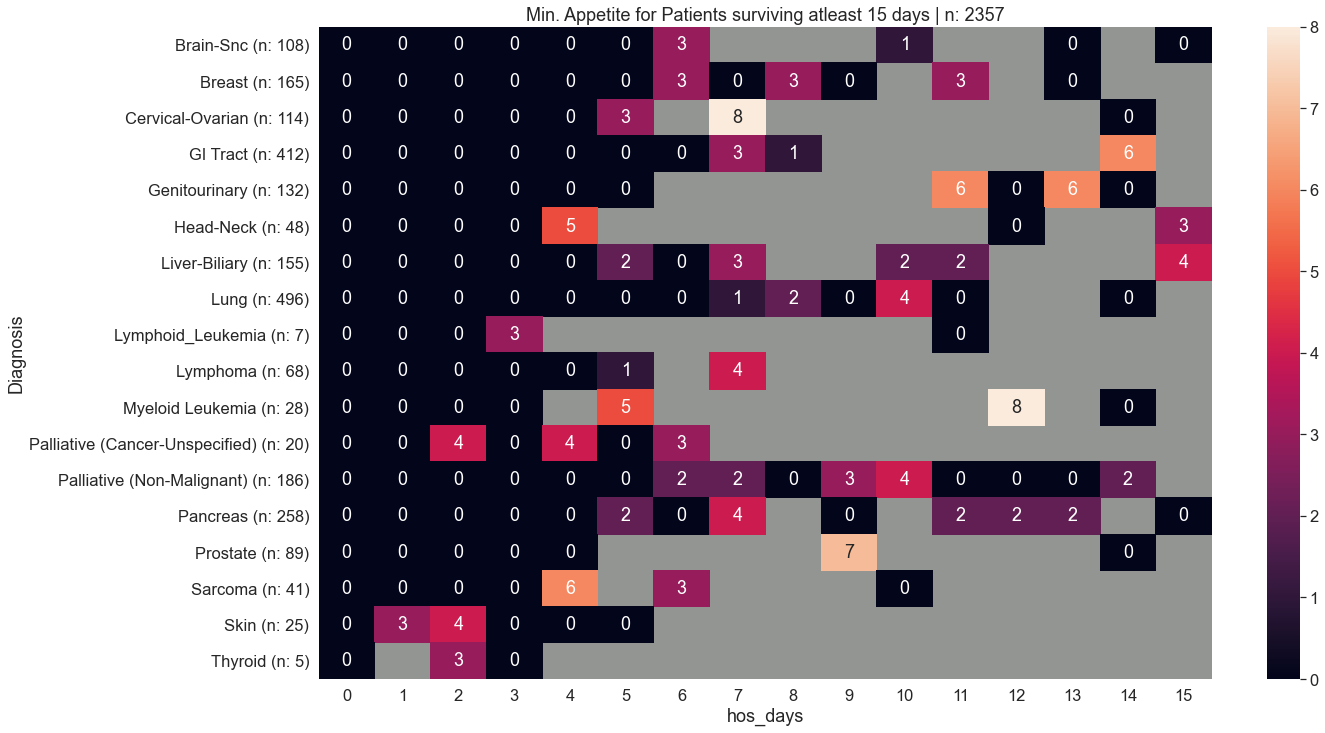

In [57]:
ax = plt.axes()
sns.heatmap(df_a6, annot=True, fmt='.2g', ax=ax)
ax.set_facecolor('xkcd:gray')
ax.set_title('Min. Appetite for Patients surviving atleast 15 days | n: ' + str(p_num))
plt.savefig('./graphs/gi/app_min_heatmap_a15.png', bbox_inches='tight')
plt.show()

## Nausea (Avg.) ##

In [58]:
# nausea plots
df_na

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,nausea,hos_days
0,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 13:14:08.350,controlled,0
1,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 14:49:10.823,controlled,1
2,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-12 12:35:54.400,controlled,3
3,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-14 12:57:43.523,controlled,5
4,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-15 12:24:44.353,controlled,6
...,...,...,...,...,...,...,...,...,...,...
8395,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-15 10:11:59.223,occasional,1
8396,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-17 15:40:20.710,occasional,4
8397,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-21 09:34:00.360,occasional,7
8398,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 18:59:35.257,occasional,0


In [59]:
df_na.loc[df_na['nausea'] == 'persistent', 'nausea'] = 10.0
df_na.loc[df_na['nausea'] == 'controlled', 'nausea'] = 3.3
df_na.loc[df_na['nausea'] == 'occasional', 'nausea'] = 6.7

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [60]:
df_na.nausea.value_counts()

6.7     5182
3.3     1740
10.0    1443
Name: nausea, dtype: int64

In [61]:
df_na['nausea'] = pd.to_numeric(df_na.nausea, errors='coerce')

<ipython-input-61-f439dfa3466b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na['nausea'] = pd.to_numeric(df_na.nausea, errors='coerce')


In [62]:
df_na

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,nausea,hos_days
0,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 13:14:08.350,3.3,0
1,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 14:49:10.823,3.3,1
2,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-12 12:35:54.400,3.3,3
3,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-14 12:57:43.523,3.3,5
4,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-15 12:24:44.353,3.3,6
...,...,...,...,...,...,...,...,...,...,...
8395,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-15 10:11:59.223,6.7,1
8396,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-17 15:40:20.710,6.7,4
8397,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-21 09:34:00.360,6.7,7
8398,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 18:59:35.257,6.7,0


In [63]:
df_na.nausea.value_counts()

6.7     5182
3.3     1740
10.0    1443
Name: nausea, dtype: int64

In [64]:
# normalied nausea across all patients
df_n1 = df_na[['IDEHR', 'hos_days', 'nausea']].groupby(by=['hos_days']).agg(['mean', 'count']).reset_index()
df_n1

hos_days         IDEHR          nausea      
                      mean count      mean count
0          0  11701.290398   427  7.330445   427
1          1  10590.908686   449  7.076392   449
2          2   9992.382445   319  6.900940   319
3          3  10998.089744   312  6.830449   312
4          4   9894.097276   257  6.924125   257
..       ...           ...   ...       ...   ...
413      996   6762.000000     1  6.700000     1
414     1003   6762.000000     1  6.700000     1
415     1010   6762.000000     1  6.700000     1
416     1017   6762.000000     1  6.700000     1
417     1025   6762.000000     1  6.700000     1

[418 rows x 5 columns]

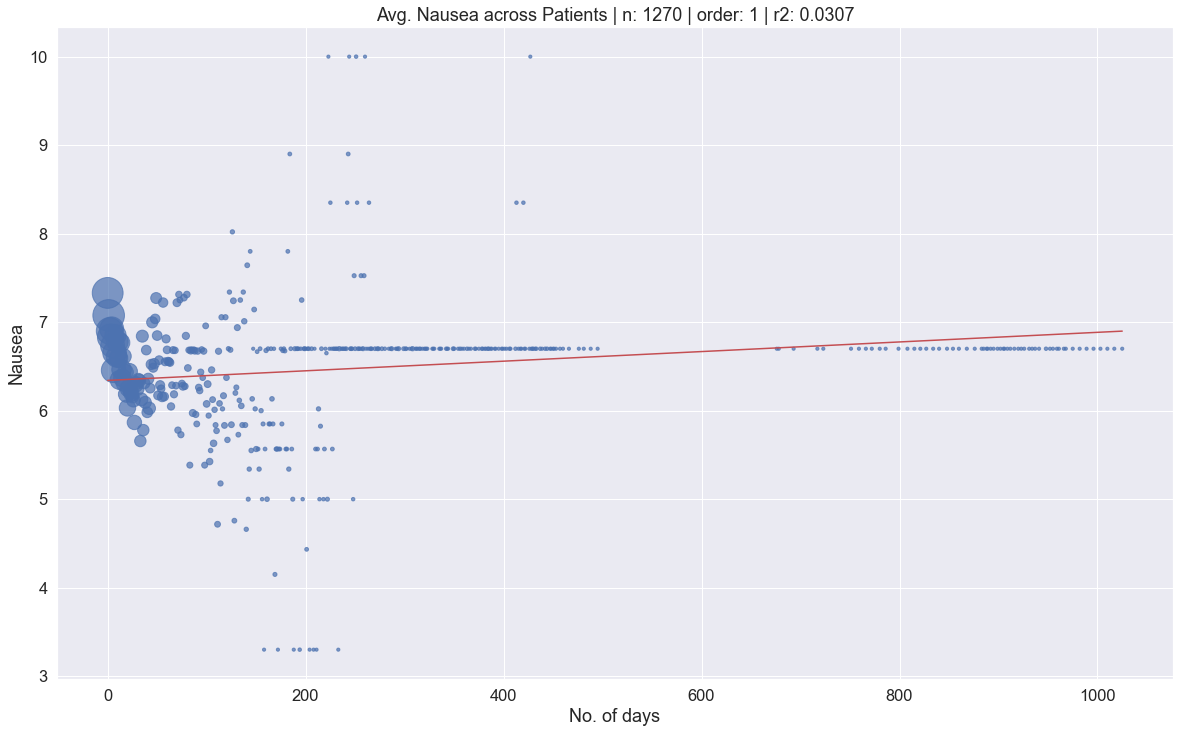

In [65]:
fig, ax = plt.subplots()
x = df_n1['hos_days']
y = df_n1['nausea']['mean']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax.scatter(x, y, s=get_scatter_marker_size(df_n1['IDEHR']['count']), alpha=0.7)
ax.plot(x, slope*x + intercept, color='r')
ax.set_xlabel('No. of days')
ax.set_ylabel('Nausea')
ax.set_title('Avg. Nausea across Patients | n: ' + str(len(df_na.IDEHR.unique())) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
plt.savefig('./graphs/gi/nau_avg.png', bbox_inches='tight')
plt.show()

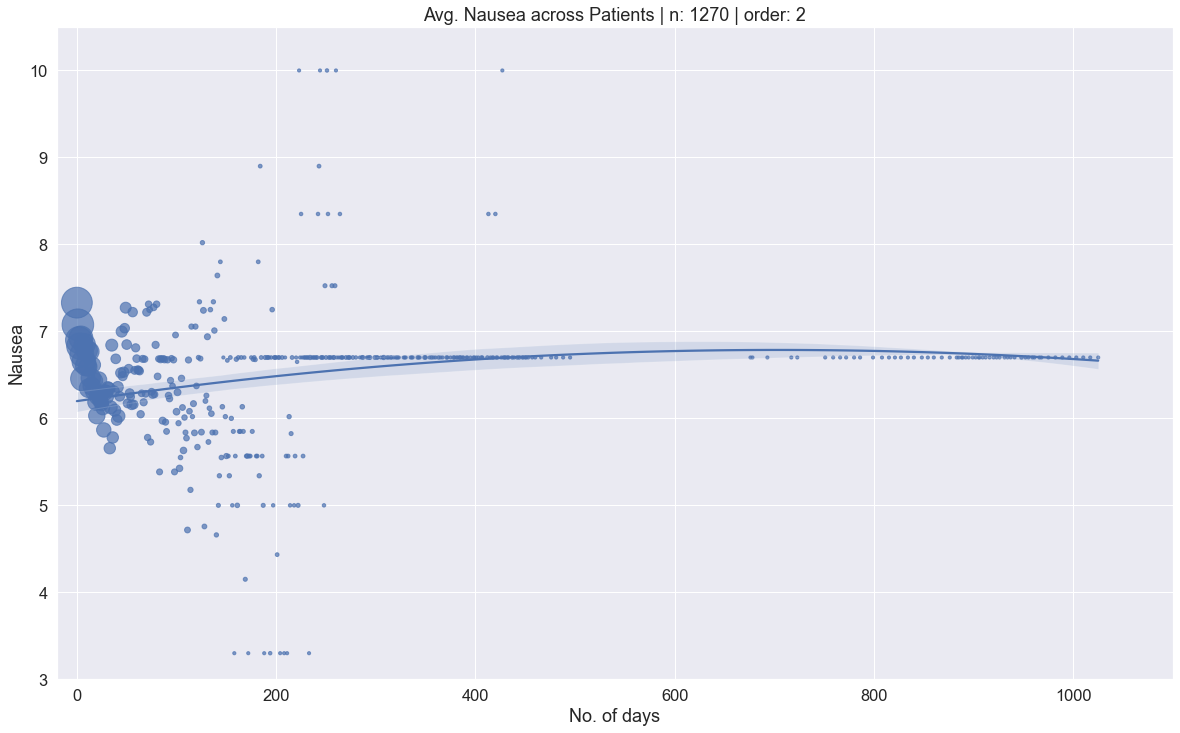

In [66]:
fig, ax = plt.subplots()
x = df_n1['hos_days']
y = df_n1['nausea']['mean']
# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# ax.scatter(x, y, s=get_scatter_marker_size(df_n1['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x, y=y, color='b', ax=ax, order=2, scatter_kws={'s':get_scatter_marker_size(df_n1['IDEHR']['count']), 'alpha':0.7})
ax.set_xlabel('No. of days')
ax.set_ylabel('Nausea')
ax.set(xlim=(-20,1100), ylim=(3,10.5))
ax.set_title('Avg. Nausea across Patients | n: ' + str(len(df_na.IDEHR.unique())) + ' | order: 2')
plt.savefig('./graphs/gi/nau_avg_sns.png', bbox_inches='tight')
plt.show()

In [67]:
# ax = plt.axes()
# sns.regplot(x='hos_days', y='nausea', data=df_n1, ax=ax, order=1)
# ax.set_title('Avg. Nausea across Patients | n: ' + str(len(df_na.IDEHR.unique())) + ' | order: 1')
# plt.show()

In [68]:
# ax = plt.axes()
# sns.regplot(x='hos_days', y='nausea', data=df_n1, ax=ax, order=3)
# ax.set_title('Avg. Nausea across Patients | n: ' + str(len(df_na.IDEHR.unique())) + ' | order: 3')
# plt.show()

In [69]:
# ax = plt.axes()
# sns.regplot(x='hos_days', y='nausea', data=df_n1, ax=ax, order=4)
# ax.set_title('Avg. Nausea across Patients | n: ' + str(len(df_na.IDEHR.unique())) + ' | order: 4')
# plt.show()

In [70]:
# pain relief of patients surviving atleast x days
s_time = 30
df_n2 = df_na[df_na['survival_time_days'] >= s_time]
df_n2 = df_n2[df_n2['hos_days'] <= s_time]
p_num = len(df_n2.IDEHR.unique())
df_n2 = df_n2[['IDEHR', 'hos_days', 'nausea']].groupby(by=['hos_days']).agg(['mean', 'count']).reset_index()

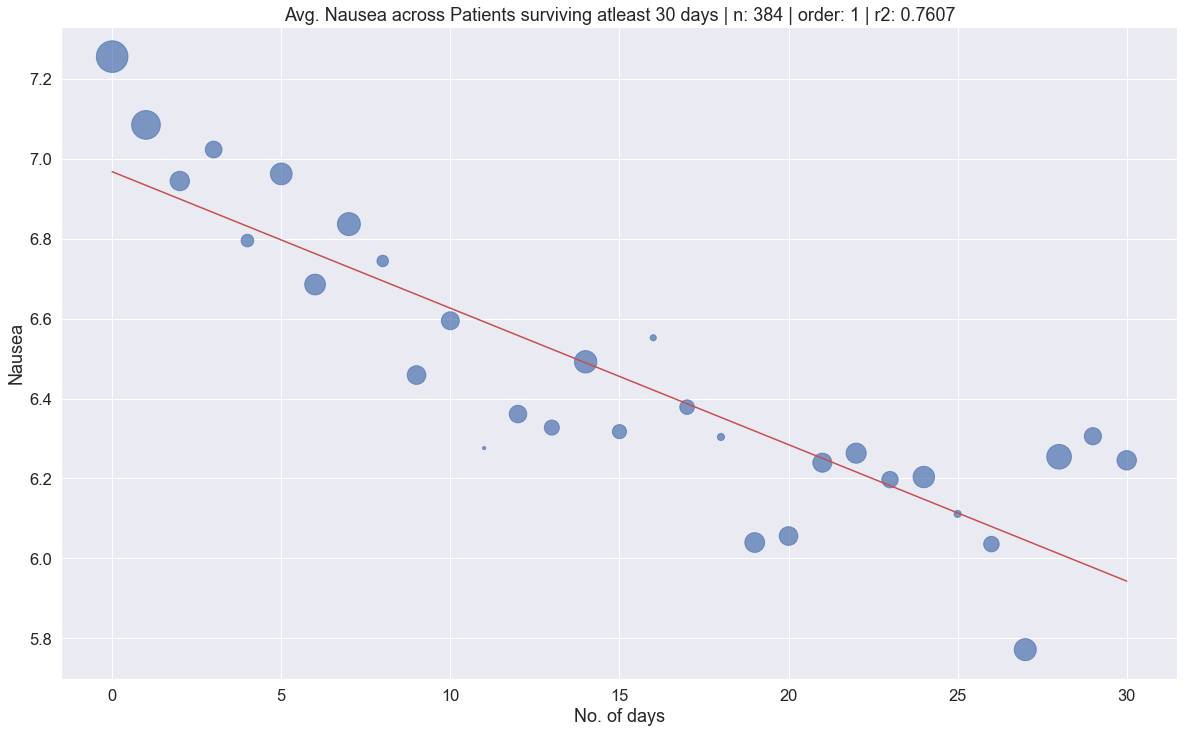

In [71]:
fig, ax = plt.subplots()
x = df_n2['hos_days']
y = df_n2['nausea']['mean']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax.scatter(x, y, s=get_scatter_marker_size(df_n2['IDEHR']['count']), alpha=0.7)
ax.plot(x, slope*x + intercept, color='r')
ax.set_xlabel('No. of days')
ax.set_ylabel('Nausea')
ax.set_title('Avg. Nausea across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
plt.savefig('./graphs/gi/nau_avg_a30.png', bbox_inches='tight')
plt.show()

In [72]:
# pain relief of patients surviving atleast x days
s_time = 60
df_n2 = df_na[df_na['survival_time_days'] >= s_time]
df_n2 = df_n2[df_n2['hos_days'] <= s_time]
p_num = len(df_n2.IDEHR.unique())
df_n2 = df_n2[['IDEHR', 'hos_days', 'nausea']].groupby(by=['hos_days']).agg(['mean', 'count']).reset_index()

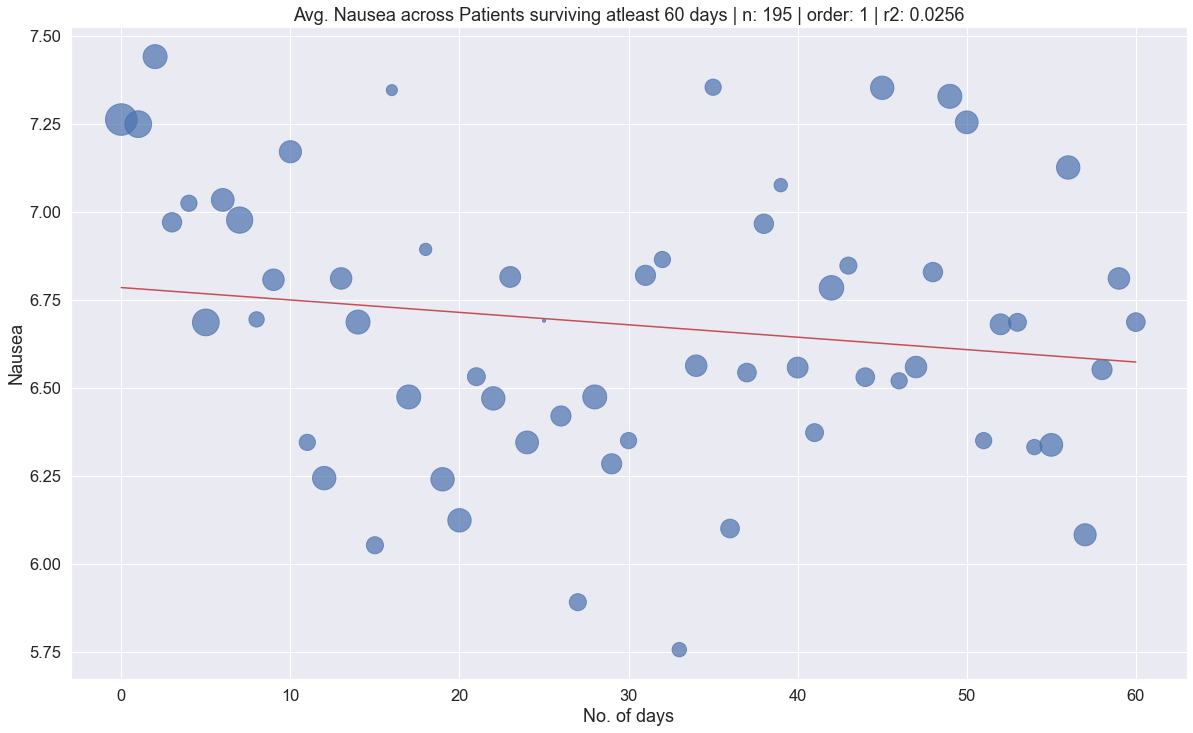

In [73]:
fig, ax = plt.subplots()
x = df_n2['hos_days']
y = df_n2['nausea']['mean']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax.scatter(x, y, s=get_scatter_marker_size(df_n2['IDEHR']['count']), alpha=0.7)
ax.plot(x, slope*x + intercept, color='r')
ax.set_xlabel('No. of days')
ax.set_ylabel('Nausea')
ax.set_title('Avg. Nausea across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
plt.savefig('./graphs/gi/nau_avg_a60.png', bbox_inches='tight')
plt.show()

In [74]:
# ax = plt.axes()
# sns.regplot(x='hos_days', y='nausea', data=df_n2, ax=ax, order=1)
# ax.set_title('Avg. Nausea across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1')
# plt.show()

In [75]:
# ax = plt.axes()
# sns.regplot(x='hos_days', y='nausea', data=df_n2, ax=ax, order=3)
# ax.set_title('Avg. Nausea across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 3')
# plt.show()

In [76]:
# nausea split by EHRType
df_n3 = df_na[['IDEHR', 'EHRType', 'hos_days', 'nausea']].groupby(by=['EHRType', 'hos_days']).agg(['mean', 'count']).reset_index()
df_n3

EHRType hos_days         IDEHR           nausea      
                              mean count       mean count
0       AMB        0  16625.303704   270   7.464074   270
1       AMB        1  17730.382883   222   7.470721   222
2       AMB        2  16886.655844   154   7.096753   154
3       AMB        3  18057.413580   162   7.038272   162
4       AMB        4  16205.343511   131   7.016794   131
..      ...      ...           ...   ...        ...   ...
526     EHR      131   2131.000000     1  10.000000     1
527     EHR      135   2131.000000     1  10.000000     1
528     EHR      136   2131.000000     1  10.000000     1
529     EHR      137   2131.000000     1  10.000000     1
530     EHR      138   2131.000000     1  10.000000     1

[531 rows x 6 columns]

In [77]:
e_num = len(df_na[df_na['EHRType'] == 'EHR'].IDEHR.unique())
a_num = len(df_na[df_na['EHRType'] == 'AMB'].IDEHR.unique())
# sns.lmplot(x='hos_days', y='nausea', hue='EHRType', data=df_n3, order=1, height=10, aspect=1.8).fig.suptitle('Avg. Nausea across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | order: 1')

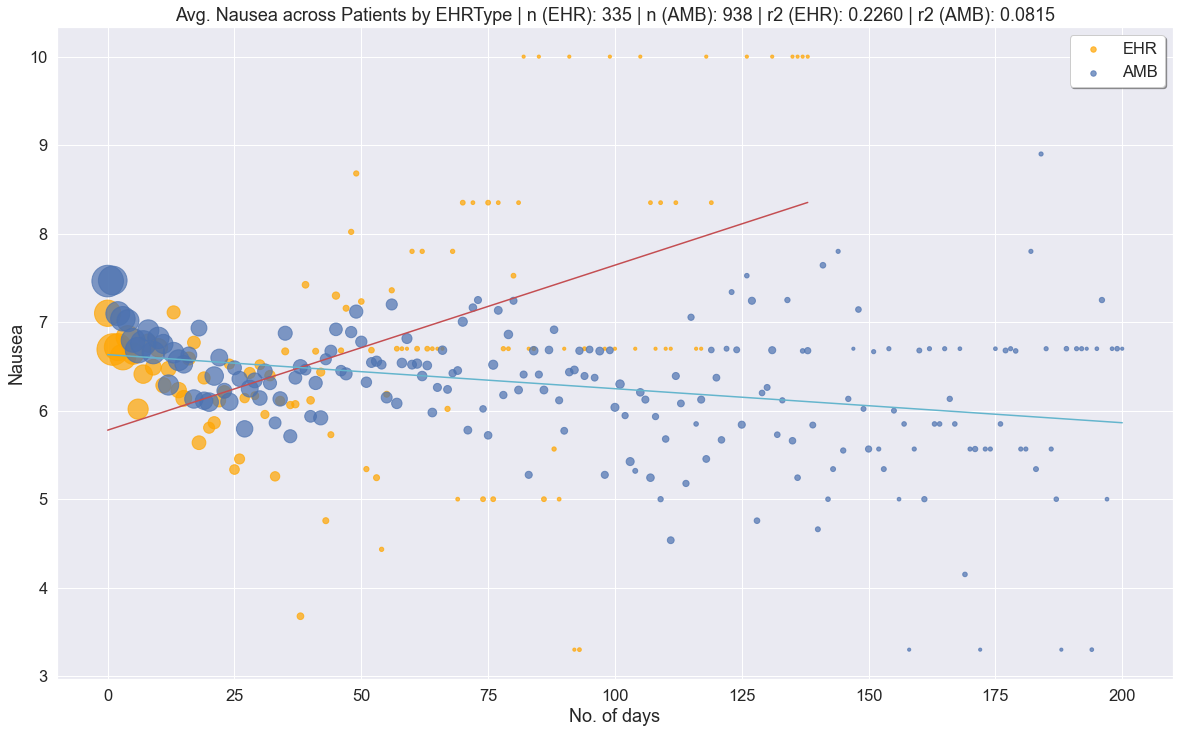

In [78]:
df_n3 = df_n3[df_n3['hos_days'] <= 200]
fig, ax = plt.subplots()
x_ehr = df_n3[df_n3['EHRType'] == 'EHR']['hos_days']
y_ehr = df_n3[df_n3['EHRType'] == 'EHR']['nausea']['mean']
slope, intercept, r_value_ehr, p_value, std_err = stats.linregress(x_ehr,y_ehr)
l1 = ax.scatter(x_ehr, y_ehr, color='orange', s=get_scatter_marker_size(df_n3[df_n3['EHRType'] == 'EHR']['IDEHR']['count']), alpha=0.7)
ax.plot(x_ehr, slope*x_ehr + intercept, color='r')
x_amb = df_n3[df_n3['EHRType'] == 'AMB']['hos_days']
y_amb = df_n3[df_n3['EHRType'] == 'AMB']['nausea']['mean']
slope, intercept, r_value_amb, p_value, std_err = stats.linregress(x_amb,y_amb)
l2 = ax.scatter(x_amb, y_amb, color='b', s=get_scatter_marker_size(df_n3[df_n3['EHRType'] == 'AMB']['IDEHR']['count']), alpha=0.7)
ax.plot(x_amb, slope*x_amb + intercept, color='c')
lgnd = ax.legend((l1, l2), ('EHR', 'AMB'), loc='best', shadow=True, facecolor='w')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
ax.set_xlabel('No. of days')
ax.set_ylabel('Nausea')
ax.set_title('Avg. Nausea across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | r2 (EHR): ' + "{:.4f}".format(r_value_ehr ** 2) + " | r2 (AMB): " + "{:.4f}".format(r_value_amb ** 2))
plt.savefig('./graphs/gi/nau_avg_ehr.png', bbox_inches='tight')                
plt.show()

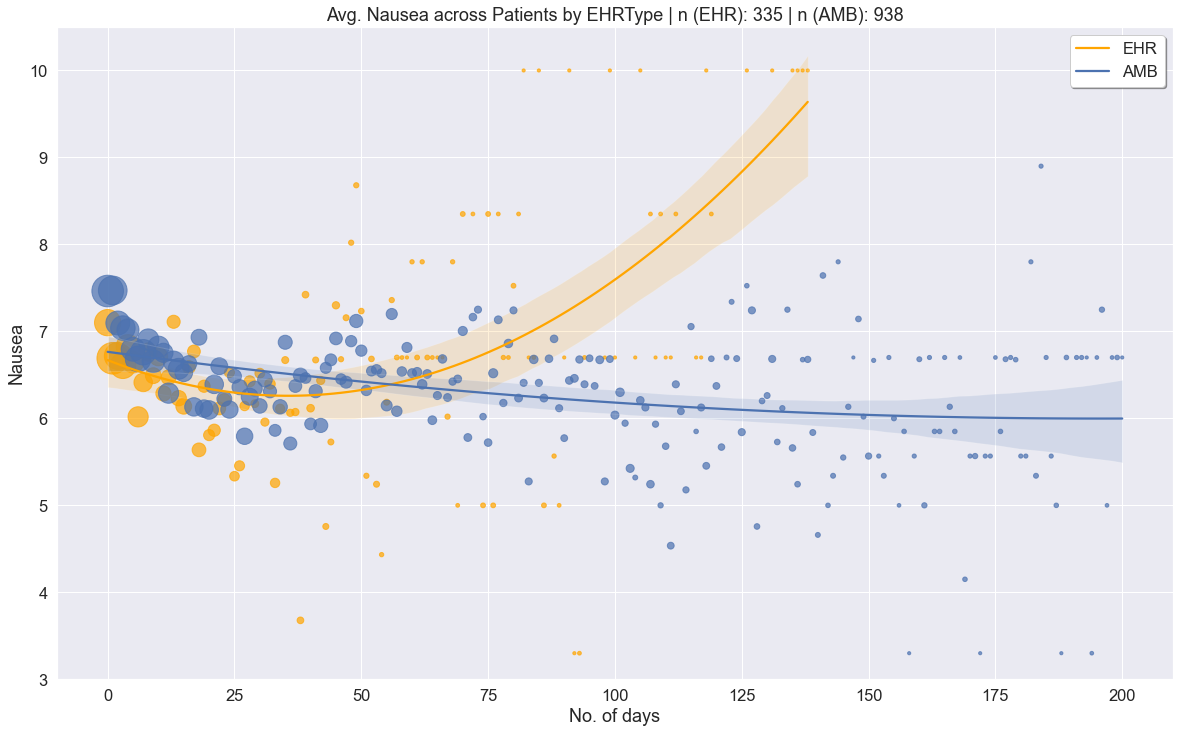

In [79]:
df_n3 = df_n3[df_n3['hos_days'] <= 200]
fig, ax = plt.subplots()
x_ehr = df_n3[df_n3['EHRType'] == 'EHR']['hos_days']
y_ehr = df_n3[df_n3['EHRType'] == 'EHR']['nausea']['mean']
# slope, intercept, r_value_ehr, p_value, std_err = stats.linregress(x_ehr,y_ehr)
# l1 = ax.scatter(x_ehr, y_ehr, color='orange', s=get_scatter_marker_size(df_n3[df_n3['EHRType'] == 'EHR']['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x_ehr, y=y_ehr, color='orange', ax=ax, order=2, scatter_kws={'s':get_scatter_marker_size(df_n3[df_n3['EHRType'] == 'EHR']['IDEHR']['count']), 'alpha':0.7})
x_amb = df_n3[df_n3['EHRType'] == 'AMB']['hos_days']
y_amb = df_n3[df_n3['EHRType'] == 'AMB']['nausea']['mean']
# slope, intercept, r_value_amb, p_value, std_err = stats.linregress(x_amb,y_amb)
# l2 = ax.scatter(x_amb, y_amb, color='b', s=get_scatter_marker_size(df_n3[df_n3['EHRType'] == 'AMB']['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x_amb, y=y_amb, color='b', ax=ax, order=2, scatter_kws={'s':get_scatter_marker_size(df_n3[df_n3['EHRType'] == 'AMB']['IDEHR']['count']), 'alpha':0.7})
lgnd = ax.legend(('EHR', 'AMB'), loc='best', shadow=True, facecolor='w')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
ax.set(xlim=(-10, 210), ylim=(3,10.5))
ax.set_xlabel('No. of days')
ax.set_ylabel('Nausea')
ax.set_title('Avg. Nausea across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num))
plt.savefig('./graphs/gi/nau_avg_ehr_sns.png', bbox_inches='tight')                
plt.show()

In [80]:
# e_num = len(df_na[df_na['EHRType'] == 'EHR'].IDEHR.unique())
# a_num = len(df_na[df_na['EHRType'] == 'AMB'].IDEHR.unique())
# sns.lmplot(x='hos_days', y='nausea', hue='EHRType', data=df_n3, order=3, height=10, aspect=1.8).fig.suptitle('Avg. Nausea across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | order: 3')

In [81]:
# e_num = len(df_na[df_na['EHRType'] == 'EHR'].IDEHR.unique())
# a_num = len(df_na[df_na['EHRType'] == 'AMB'].IDEHR.unique())
# sns.lmplot(x='hos_days', y='nausea', hue='EHRType', data=df_n3, order=4, height=10, aspect=1.8).fig.suptitle('Avg. Nausea across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | order: 4')

In [82]:
df_na[['EHRType', 'survival_time_days', 'hos_days']].groupby(by=['EHRType']).agg({'survival_time_days': [np.min, np.max, np.mean], 'hos_days': [np.min, np.max, np.mean]})

survival_time_days                     hos_days                 
                      amin    amax        mean     amin  amax       mean
EHRType                                                                 
AMB                    0.0  1416.0  112.949411        0  1025  57.432576
EHR                    0.0   139.0   29.001712        0   138  15.718322

In [83]:
# nausea split by setting
print(len(df_na.IDEHR.unique()))
df_set = pd.read_excel('./vidas_data/IDEHR-EHRType-OU.xlsx')
df_set = df_set.rename(columns={"UO (Setting)\n": 'Setting'})
df_st = pd.merge(df_na, df_set, on=['IDEHR', 'EHRType'])
print(len(df_st.IDEHR.unique()))
df_st

1270
1270


,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,nausea,hos_days,PatientID,Setting
0,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 13:14:08.350,3.3,0,30879,Hospice
1,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 14:49:10.823,3.3,1,30879,Hospice
2,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-12 12:35:54.400,3.3,3,30879,Hospice
3,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-14 12:57:43.523,3.3,5,30879,Hospice
4,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-15 12:24:44.353,3.3,6,30879,Hospice
...,...,...,...,...,...,...,...,...,...,...,...,...
8360,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-15 10:11:59.223,6.7,1,59851,Domicilio
8361,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-17 15:40:20.710,6.7,4,59851,Domicilio
8362,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-21 09:34:00.360,6.7,7,59851,Domicilio
8363,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 18:59:35.257,6.7,0,59898,Domicilio


In [84]:
df_n4 = df_st[['IDEHR', 'Setting', 'hos_days', 'nausea']].groupby(by=['Setting', 'hos_days']).agg(['mean', 'count']).reset_index()
df_n4

Setting hos_days         IDEHR           nausea      
                                          mean count       mean count
0             Domicilio        0  16625.303704   270   7.464074   270
1             Domicilio        1  17730.382883   222   7.470721   222
2             Domicilio        2  16886.655844   154   7.096753   154
3             Domicilio        3  18057.413580   162   7.038272   162
4             Domicilio        4  16205.343511   131   7.016794   131
..                  ...      ...           ...   ...        ...   ...
547  Hospice Pediatrico        9   3774.000000     1  10.000000     1
548  Hospice Pediatrico       11   3774.000000     1  10.000000     1
549  Hospice Pediatrico       12   3774.000000     1  10.000000     1
550  Hospice Pediatrico       13   3774.000000     2  10.000000     2
551  Hospice Pediatrico       14   3774.000000     1  10.000000     1

[552 rows x 6 columns]

In [85]:
df_st[['Setting', 'survival_time_days', 'hos_days']].groupby(by=['Setting']).agg({'survival_time_days': [np.min, np.max, np.mean], 'hos_days': [np.min, np.max, np.mean]})

survival_time_days                     hos_days        \
                                   amin    amax        mean     amin  amax   
Setting                                                                      
Domicilio                           0.0  1416.0  112.973260        0  1025   
Domicilio Pediatrico               95.0    95.0   95.000000       35    94   
Hospice                             0.0   139.0   29.203037        0   138   
Hospice Pediatrico                  8.0    23.0   14.032258        0    14   

                                 
                           mean  
Setting                          
Domicilio             57.411227  
Domicilio Pediatrico  73.500000  
Hospice               15.854230  
Hospice Pediatrico     5.612903

In [86]:
df_st[['IDEHR', 'Setting']].groupby(by=['Setting']).agg(['nunique'])

,IDEHR
,nunique
Setting,
Domicilio,937
Domicilio Pediatrico,1
Hospice,332
Hospice Pediatrico,3


In [87]:
df_n4[df_n4['Setting'] == 'Hospice Pediatrico'] = np.nan
df_n4[df_n4['Setting'] == 'Domicilio Pediatrico'] = np.nan
df_n4 = df_n4.dropna()

In [88]:
d_num = len(df_st[df_st['Setting'] == 'Domicilio'].IDEHR.unique())
h_num = len(df_st[df_st['Setting'] == 'Hospice'].IDEHR.unique())
# sns.lmplot(x='hos_days', y='nausea', hue='Setting', data=df_n4, order=1, height=10, aspect=1.8).fig.suptitle('Avg. Nausea across Patients by Setting | n (D): ' + str(d_num) + ' | n (H): ' + str(h_num) + ' | order: 1')

In [89]:
# Setting for only first 200 days
df_n5 = df_n4[df_n4['hos_days'] <= 200]
# sns.lmplot(x='hos_days', y='nausea', hue='Setting', data=df_n5, order=1, height=10, aspect=1.8).fig.suptitle('Avg. Nausea across Patients by Setting | n (D): ' + str(d_num) + ' | n (H): ' + str(h_num) + ' | order: 1')

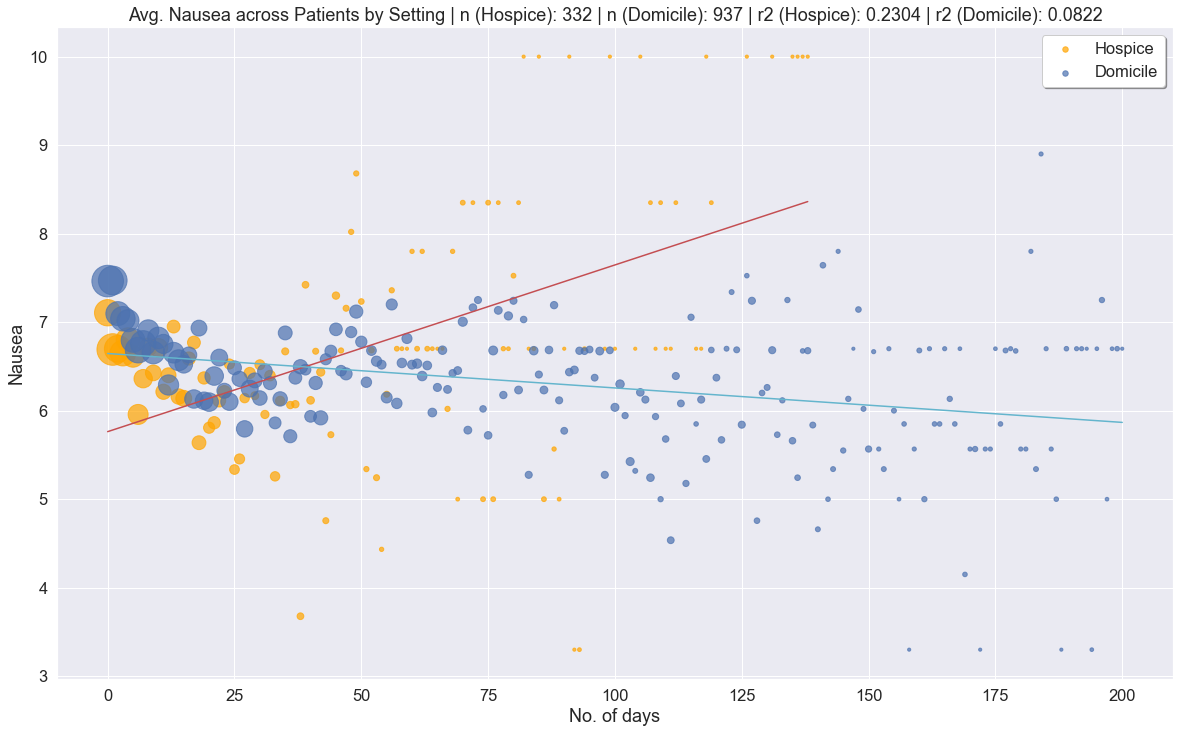

In [90]:
fig, ax = plt.subplots()
x_hos = df_n5[df_n5['Setting'] == 'Hospice']['hos_days']
y_hos = df_n5[df_n5['Setting'] == 'Hospice']['nausea']['mean']
slope, intercept, r_value_hos, p_value, std_err = stats.linregress(x_hos,y_hos)
l1 = ax.scatter(x_hos, y_hos, color='orange', s=get_scatter_marker_size(df_n5[df_n5['Setting'] == 'Hospice']['IDEHR']['count']), alpha=0.7)
ax.plot(x_hos, slope*x_hos + intercept, color='r')
x_dom = df_n5[df_n5['Setting'] == 'Domicilio']['hos_days']
y_dom = df_n5[df_n5['Setting'] == 'Domicilio']['nausea']['mean']
slope, intercept, r_value_dom, p_value, std_err = stats.linregress(x_dom,y_dom)
l2 = ax.scatter(x_dom, y_dom, color='b', s=get_scatter_marker_size(df_n5[df_n5['Setting'] == 'Domicilio']['IDEHR']['count']), alpha=0.7)
ax.plot(x_dom, slope*x_dom + intercept, color='c')
lgnd = ax.legend((l1, l2), ('Hospice', 'Domicile'), loc='best', shadow=True, facecolor='w')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
ax.set_xlabel('No. of days')
ax.set_ylabel('Nausea')
ax.set_title('Avg. Nausea across Patients by Setting | n (Hospice): ' + str(h_num) + ' | n (Domicile): ' + str(d_num) + ' | r2 (Hospice): ' + "{:.4f}".format(r_value_hos ** 2) + " | r2 (Domicile): " + "{:.4f}".format(r_value_dom ** 2))
plt.savefig('./graphs/gi/nau_avg_set.png', bbox_inches='tight')                
plt.show()

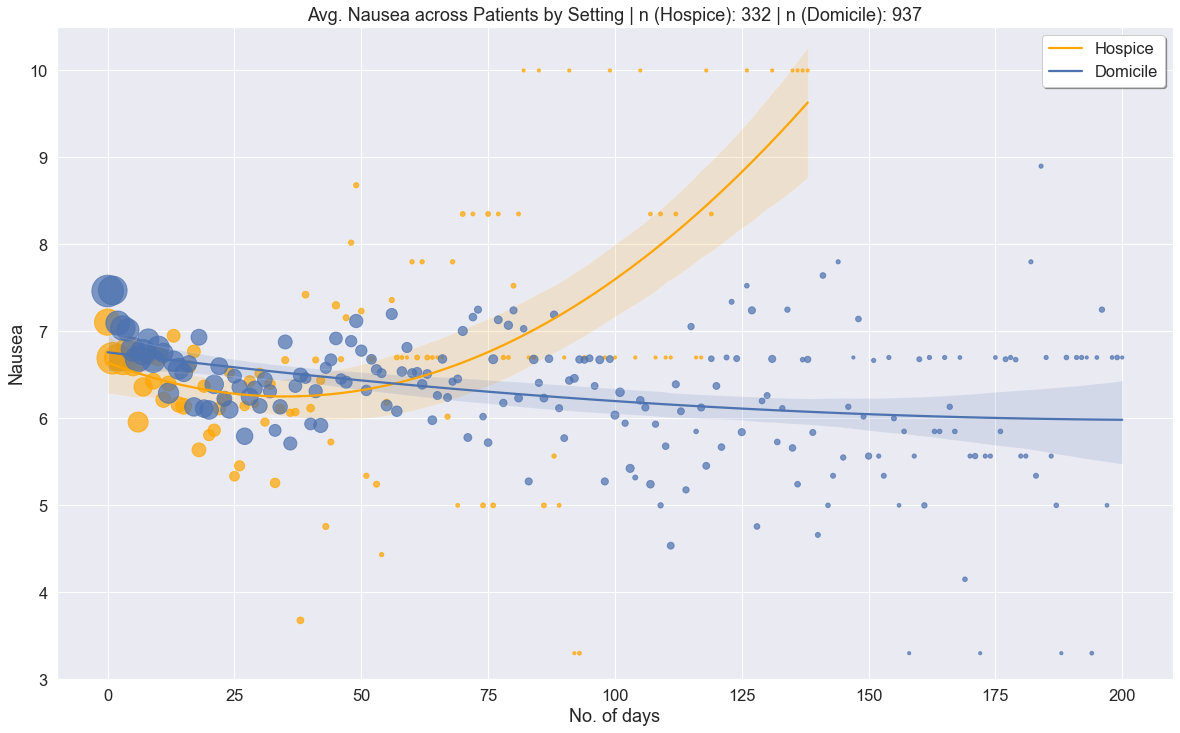

In [91]:
fig, ax = plt.subplots()
x_hos = df_n5[df_n5['Setting'] == 'Hospice']['hos_days']
y_hos = df_n5[df_n5['Setting'] == 'Hospice']['nausea']['mean']
# slope, intercept, r_value_hos, p_value, std_err = stats.linregress(x_hos,y_hos)
# l1 = ax.scatter(x_hos, y_hos, color='orange', s=get_scatter_marker_size(df_n5[df_n5['Setting'] == 'Hospice']['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x_hos, y=y_hos, color='orange', ax=ax, order=2, scatter_kws={'s':get_scatter_marker_size(df_n5[df_n5['Setting'] == 'Hospice']['IDEHR']['count']), 'alpha':0.7})
x_dom = df_n5[df_n5['Setting'] == 'Domicilio']['hos_days']
y_dom = df_n5[df_n5['Setting'] == 'Domicilio']['nausea']['mean']
# slope, intercept, r_value_dom, p_value, std_err = stats.linregress(x_dom,y_dom)
# l2 = ax.scatter(x_dom, y_dom, color='b', s=get_scatter_marker_size(df_n5[df_n5['Setting'] == 'Domicilio']['IDEHR']['count']), alpha=0.7)
sns.regplot(x=x_dom, y=y_dom, color='b', ax=ax, order=2, scatter_kws={'s':get_scatter_marker_size(df_n5[df_n5['Setting'] == 'Domicilio']['IDEHR']['count']), 'alpha':0.7})
lgnd = ax.legend(('Hospice', 'Domicile'), loc='best', shadow=True, facecolor='w')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
ax.set(xlim=(-10, 210), ylim=(3,10.5))
ax.set_xlabel('No. of days')
ax.set_ylabel('Nausea')
ax.set_title('Avg. Nausea across Patients by Setting | n (Hospice): ' + str(h_num) + ' | n (Domicile): ' + str(d_num))
plt.savefig('./graphs/gi/nau_avg_set_sns.png', bbox_inches='tight')                
plt.show()

In [92]:
# append the number of patients to each diagnosis name
d_label = df_na[df_na['hos_days'] <= 90][['IDEHR', 'Diagnosis']].drop_duplicates()['Diagnosis'].value_counts()
df_n6 = df_na[['Diagnosis', 'hos_days', 'nausea']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_n6 = df_n6[df_n6['hos_days'] <= 90]
df_n6['Diagnosis'] = df_n6['Diagnosis'].apply(lambda x: np.nan if isinstance(x, float) else x + ' (n: ' + str(d_label[x]) + ')')
d_label

GI Tract                           262
Pancreas                           204
Lung                               153
Liver-Biliary                      109
Cervical-Ovarian                    93
Breast                              83
Palliative (Non-Malignant)          78
Genitourinary                       61
Prostate                            43
Sarcoma                             22
Brain-Snc                           21
Skin                                18
Lymphoma                            17
Head-Neck                           16
Myeloid Leukemia                    15
Palliative (Cancer-Unspecified)     13
Lymphoid_Leukemia                    5
Thyroid                              2
Name: Diagnosis, dtype: int64

In [93]:
print(df_na[df_na['hos_days'] <= 90][['IDEHR', 'Diagnosis']].groupby(by=['Diagnosis']).nunique().stack().sum())
df_na[df_na['hos_days'] <= 90][['IDEHR', 'Diagnosis']].groupby(by=['Diagnosis']).nunique().stack()

1215


Diagnosis                             
Brain-Snc                        IDEHR     21
Breast                           IDEHR     83
Cervical-Ovarian                 IDEHR     93
GI Tract                         IDEHR    262
Genitourinary                    IDEHR     61
Head-Neck                        IDEHR     16
Liver-Biliary                    IDEHR    109
Lung                             IDEHR    153
Lymphoid_Leukemia                IDEHR      5
Lymphoma                         IDEHR     17
Myeloid Leukemia                 IDEHR     15
Palliative (Cancer-Unspecified)  IDEHR     13
Palliative (Non-Malignant)       IDEHR     78
Pancreas                         IDEHR    204
Prostate                         IDEHR     43
Sarcoma                          IDEHR     22
Skin                             IDEHR     18
Thyroid                          IDEHR      2
dtype: int64

In [94]:
# heatmaps of avg nausea across diagnosis
d_label = df_na[df_na['hos_days'] <= 90][['IDEHR', 'Diagnosis']].groupby(by=['Diagnosis']).nunique().stack()
df_n6 = df_na[['Diagnosis', 'hos_days', 'nausea']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_n6 = df_n6[df_n6['hos_days'] <= 90]
df_n6['Diagnosis'] = df_n6['Diagnosis'].apply(lambda x: np.nan if isinstance(x, float) else x + ' (n: ' + str(d_label[x][0]) + ')')
p_num = d_label.sum()
df_n6 = df_n6.pivot(index='Diagnosis', columns='hos_days', values='nausea')
df_n6

hos_days,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc (n: 21),7.642857,6.975000,8.020000,8.114286,7.171429,7.800000,5.837500,8.350000,7.800000,7.500000,...,NaN,NaN,NaN,NaN,NaN,3.3,NaN,3.30,3.30,NaN
Breast (n: 83),7.903333,7.467647,7.127273,6.541667,5.841667,6.676000,6.453333,7.518750,6.355000,6.677778,...,NaN,NaN,6.70,NaN,NaN,7.8,6.700,NaN,NaN,6.700000
Cervical-Ovarian (n: 93),7.187179,6.920000,7.084848,6.546154,6.425926,6.300000,6.529167,7.113043,6.505263,6.838095,...,5.566667,8.35,3.30,7.800000,NaN,3.3,6.700,6.70,NaN,3.300000
GI Tract (n: 262),7.259770,7.338235,6.684000,6.962500,6.887500,6.438889,6.416000,6.627586,6.604762,6.223529,...,7.800000,6.70,5.85,7.525000,8.350000,6.7,6.680,6.70,6.68,6.700000
Genitourinary (n: 61),7.736842,7.330769,7.171429,7.690000,7.350000,6.442857,6.691667,6.893750,7.171429,7.525000,...,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,10.00,3.30,NaN
Head-Neck (n: 16),7.525000,6.700000,6.685714,5.340000,5.000000,6.680000,7.800000,3.300000,5.980000,7.766667,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,10.00,10.00,NaN
Liver-Biliary (n: 109),7.017500,7.200000,6.816000,7.212000,6.800000,7.031579,5.903846,6.305556,6.226667,6.981818,...,3.300000,6.70,6.70,NaN,5.566667,NaN,6.700,3.30,6.70,NaN
Lung (n: 153),6.801754,6.820000,6.929268,6.568966,6.564286,6.580645,6.391176,5.744000,7.051852,6.962500,...,6.700000,6.70,6.70,6.700000,6.700000,6.7,6.700,6.70,6.70,6.700000
Lymphoid_Leukemia (n: 5),NaN,7.800000,NaN,6.700000,6.700000,6.700000,6.700000,NaN,NaN,6.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.70,NaN,NaN


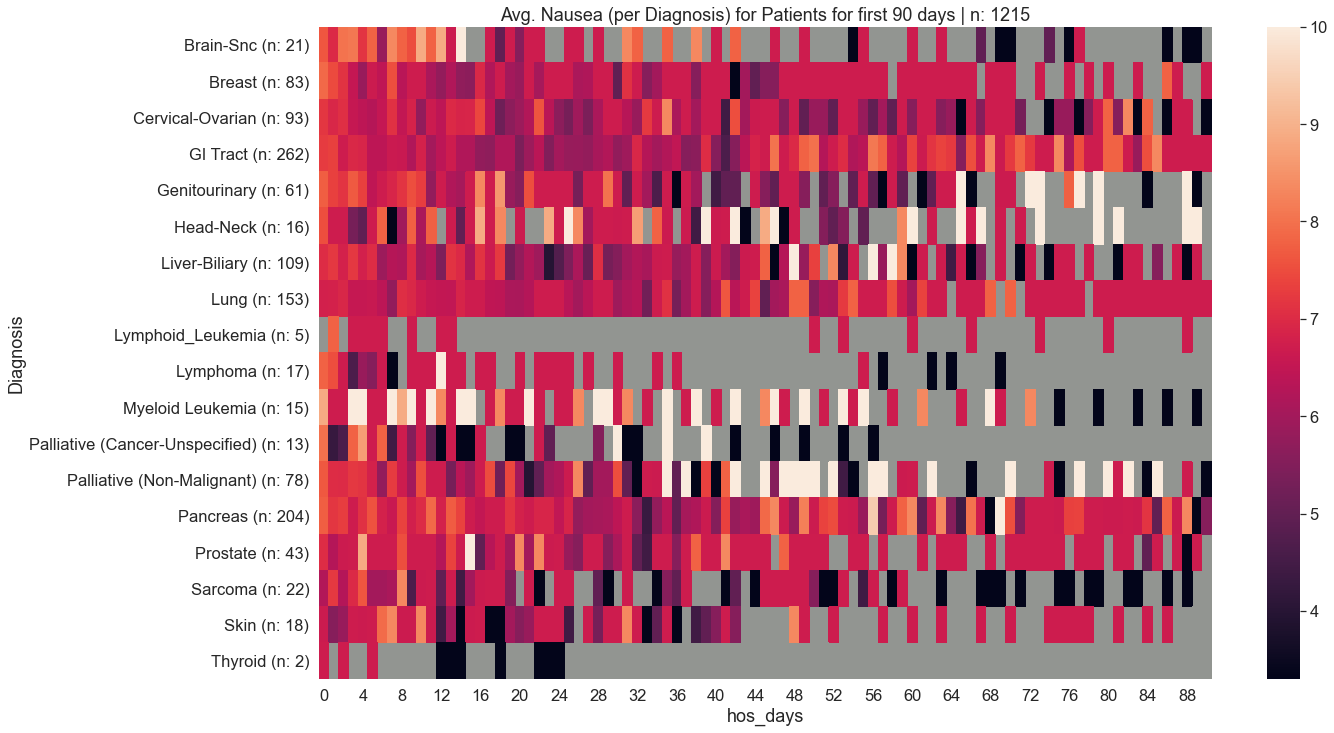

In [95]:
ax = plt.axes()
sns.heatmap(df_n6, annot=False, fmt='g', ax=ax, xticklabels=4)
ax.set_facecolor('xkcd:gray')
ax.set_title('Avg. Nausea (per Diagnosis) for Patients for first 90 days | n: ' + str(p_num))
plt.savefig('./graphs/gi/nau_avg_heatmap_f90.png', bbox_inches='tight')
plt.show()

In [96]:
get_coeffs(df_n6, 90)

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,deg1 (m),deg2 (x2),deg2 (x1)
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc (n: 21),7.642857,6.975000,8.020000,8.114286,7.171429,7.800000,5.837500,8.350000,7.800000,7.500000,...,NaN,NaN,3.3,NaN,3.30,3.30,NaN,undef,undef,undef
Breast (n: 83),7.903333,7.467647,7.127273,6.541667,5.841667,6.676000,6.453333,7.518750,6.355000,6.677778,...,NaN,NaN,7.8,6.700,NaN,NaN,6.700000,undef,undef,undef
Cervical-Ovarian (n: 93),7.187179,6.920000,7.084848,6.546154,6.425926,6.300000,6.529167,7.113043,6.505263,6.838095,...,7.800000,NaN,3.3,6.700,6.70,NaN,3.300000,undef,undef,undef
GI Tract (n: 262),7.259770,7.338235,6.684000,6.962500,6.887500,6.438889,6.416000,6.627586,6.604762,6.223529,...,7.525000,8.350000,6.7,6.680,6.70,6.68,6.700000,0.01,0,-0.01
Genitourinary (n: 61),7.736842,7.330769,7.171429,7.690000,7.350000,6.442857,6.691667,6.893750,7.171429,7.525000,...,3.300000,NaN,NaN,NaN,10.00,3.30,NaN,undef,undef,undef
Head-Neck (n: 16),7.525000,6.700000,6.685714,5.340000,5.000000,6.680000,7.800000,3.300000,5.980000,7.766667,...,NaN,NaN,NaN,NaN,10.00,10.00,NaN,undef,undef,undef
Liver-Biliary (n: 109),7.017500,7.200000,6.816000,7.212000,6.800000,7.031579,5.903846,6.305556,6.226667,6.981818,...,NaN,5.566667,NaN,6.700,3.30,6.70,NaN,undef,undef,undef
Lung (n: 153),6.801754,6.820000,6.929268,6.568966,6.564286,6.580645,6.391176,5.744000,7.051852,6.962500,...,6.700000,6.700000,6.7,6.700,6.70,6.70,6.700000,undef,undef,undef
Lymphoid_Leukemia (n: 5),NaN,7.800000,NaN,6.700000,6.700000,6.700000,6.700000,NaN,NaN,6.700000,...,NaN,NaN,NaN,NaN,6.70,NaN,NaN,undef,undef,undef


In [97]:
# heatmaps of avg nausea across diagnosis
d_label = df_na[df_na['hos_days'] <= 30][['IDEHR', 'Diagnosis']].groupby(by=['Diagnosis']).nunique().stack()
df_n6 = df_na[['Diagnosis', 'hos_days', 'nausea']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_n6 = df_n6[df_n6['hos_days'] <= 30]
df_n6['Diagnosis'] = df_n6['Diagnosis'].apply(lambda x: np.nan if isinstance(x, float) else x + ' (n: ' + str(d_label[x][0]) + ')')
p_num = d_label.sum()
df_n6 = df_n6.pivot(index='Diagnosis', columns='hos_days', values='nausea')
df_n6

hos_days,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc (n: 19),7.642857,6.975000,8.020000,8.114286,7.171429,7.800000,5.837500,8.350000,7.800000,7.500000,...,6.700000,6.700000,NaN,NaN,6.700000,6.700000,NaN,6.700000,NaN,NaN
Breast (n: 74),7.903333,7.467647,7.127273,6.541667,5.841667,6.676000,6.453333,7.518750,6.355000,6.677778,...,6.685714,6.072727,6.680000,6.700000,6.700000,6.133333,6.200000,6.700000,6.700000,5.000000
Cervical-Ovarian (n: 89),7.187179,6.920000,7.084848,6.546154,6.425926,6.300000,6.529167,7.113043,6.505263,6.838095,...,6.240000,7.600000,6.372727,5.680000,5.340000,5.944444,5.412500,6.125000,6.700000,6.677778
GI Tract (n: 237),7.259770,7.338235,6.684000,6.962500,6.887500,6.438889,6.416000,6.627586,6.604762,6.223529,...,5.891176,6.365625,5.505000,6.034615,5.837500,5.845000,5.776923,6.100000,6.252174,5.744444
Genitourinary (n: 55),7.736842,7.330769,7.171429,7.690000,7.350000,6.442857,6.691667,6.893750,7.171429,7.525000,...,7.525000,6.700000,6.700000,6.700000,6.700000,5.340000,6.700000,6.700000,8.020000,6.700000
Head-Neck (n: 16),7.525000,6.700000,6.685714,5.340000,5.000000,6.680000,7.800000,3.300000,5.980000,7.766667,...,NaN,NaN,8.900000,6.700000,10.000000,8.350000,6.020000,6.700000,6.700000,6.666667
Liver-Biliary (n: 102),7.017500,7.200000,6.816000,7.212000,6.800000,7.031579,5.903846,6.305556,6.226667,6.981818,...,6.250000,5.964286,3.980000,4.757143,5.425000,6.133333,5.127273,7.044444,5.320000,5.550000
Lung (n: 145),6.801754,6.820000,6.929268,6.568966,6.564286,6.580645,6.391176,5.744000,7.051852,6.962500,...,6.262500,6.700000,6.681818,6.690000,6.350000,6.010000,6.381818,6.677778,6.685714,5.944444
Lymphoid_Leukemia (n: 5),NaN,7.800000,NaN,6.700000,6.700000,6.700000,6.700000,NaN,NaN,6.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


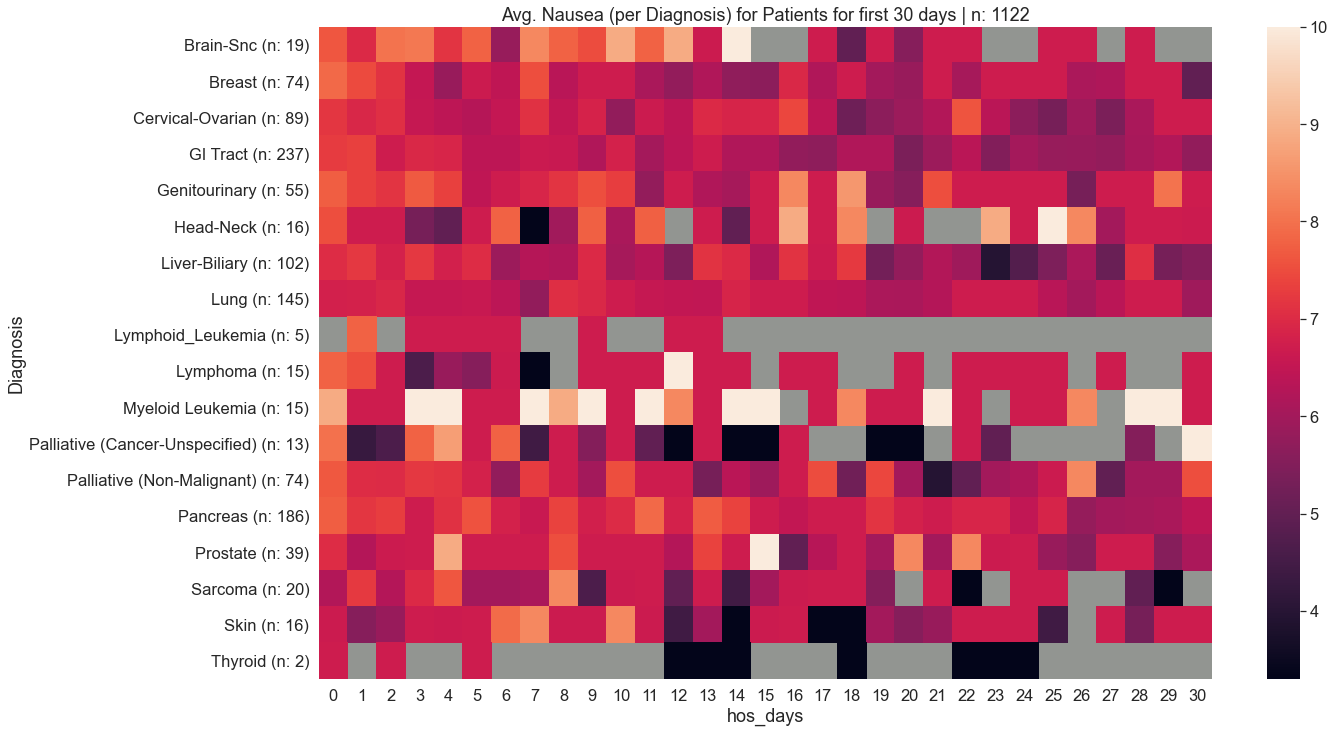

In [98]:
ax = plt.axes()
sns.heatmap(df_n6, annot=False, fmt='.1g', ax=ax)
ax.set_facecolor('xkcd:gray')
ax.set_title('Avg. Nausea (per Diagnosis) for Patients for first 30 days | n: ' + str(p_num))
plt.savefig('./graphs/gi/nau_avg_heatmap_f30.png', bbox_inches='tight')
plt.show()

In [99]:
get_coeffs(df_n6, 30)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,deg1 (m),deg2 (x2),deg2 (x1)
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc (n: 19),7.642857,6.975000,8.020000,8.114286,7.171429,7.800000,5.837500,8.350000,7.800000,7.500000,...,NaN,6.700000,6.700000,NaN,6.700000,NaN,NaN,undef,undef,undef
Breast (n: 74),7.903333,7.467647,7.127273,6.541667,5.841667,6.676000,6.453333,7.518750,6.355000,6.677778,...,6.700000,6.700000,6.133333,6.200000,6.700000,6.700000,5.000000,-0.03,0,-0.1
Cervical-Ovarian (n: 89),7.187179,6.920000,7.084848,6.546154,6.425926,6.300000,6.529167,7.113043,6.505263,6.838095,...,5.680000,5.340000,5.944444,5.412500,6.125000,6.700000,6.677778,-0.03,0,-0.05
GI Tract (n: 237),7.259770,7.338235,6.684000,6.962500,6.887500,6.438889,6.416000,6.627586,6.604762,6.223529,...,6.034615,5.837500,5.845000,5.776923,6.100000,6.252174,5.744444,-0.04,0,-0.1
Genitourinary (n: 55),7.736842,7.330769,7.171429,7.690000,7.350000,6.442857,6.691667,6.893750,7.171429,7.525000,...,6.700000,6.700000,5.340000,6.700000,6.700000,8.020000,6.700000,-0.02,0,-0.08
Head-Neck (n: 16),7.525000,6.700000,6.685714,5.340000,5.000000,6.680000,7.800000,3.300000,5.980000,7.766667,...,6.700000,10.000000,8.350000,6.020000,6.700000,6.700000,6.666667,undef,undef,undef
Liver-Biliary (n: 102),7.017500,7.200000,6.816000,7.212000,6.800000,7.031579,5.903846,6.305556,6.226667,6.981818,...,4.757143,5.425000,6.133333,5.127273,7.044444,5.320000,5.550000,-0.05,0,-0.05
Lung (n: 145),6.801754,6.820000,6.929268,6.568966,6.564286,6.580645,6.391176,5.744000,7.051852,6.962500,...,6.690000,6.350000,6.010000,6.381818,6.677778,6.685714,5.944444,-0.01,0,-0.01
Lymphoid_Leukemia (n: 5),NaN,7.800000,NaN,6.700000,6.700000,6.700000,6.700000,NaN,NaN,6.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undef,undef,undef


In [100]:
# heatmaps for patients surviving atleast x days
s_time = 30
df_n6 = df_na[df_na['survival_time_days'] >= s_time]
df_n6 = df_n6[df_n6['hos_days'] <= s_time]
d_label = df_na[df_na['hos_days'] <= s_time][['IDEHR', 'Diagnosis']].groupby(by=['Diagnosis']).nunique().stack()
p_num = d_label.sum()
df_n6 = df_n6[['Diagnosis', 'hos_days', 'nausea']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_n6 = df_n6[df_n6['hos_days'] <= s_time]
df_n6['Diagnosis'] = df_n6['Diagnosis'].apply(lambda x: np.nan if isinstance(x, float) else x + ' (n: ' + str(d_label[x][0]) + ')')
df_n6 = df_n6.pivot(index='Diagnosis', columns='hos_days', values='nausea')
df_n6

hos_days,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc (n: 19),7.800000,6.700000,6.700000,NaN,6.700000,10.000000,3.300000,10.000000,NaN,NaN,...,NaN,6.700000,NaN,NaN,6.700000,6.700000,NaN,6.700000,NaN,NaN
Breast (n: 74),7.290909,6.360000,7.800000,6.700000,6.700000,7.422222,6.687500,7.250000,6.700000,5.566667,...,6.700000,6.214286,5.850000,6.700000,6.700000,6.133333,6.200000,6.700000,6.700000,5.000000
Cervical-Ovarian (n: 89),7.055556,7.512500,8.114286,7.233333,7.250000,10.000000,8.585714,8.114286,7.360000,8.350000,...,6.683333,6.700000,7.100000,5.728571,5.566667,6.700000,5.000000,6.381818,6.700000,6.677778
GI Tract (n: 237),6.937037,7.224000,6.015000,6.695238,6.442857,6.686957,6.207143,7.000000,6.488235,6.209524,...,5.618182,6.296154,5.786667,5.675000,6.020000,5.894118,5.608000,6.161538,6.252174,5.744444
Genitourinary (n: 55),8.020000,6.975000,6.700000,6.700000,6.700000,6.700000,6.700000,7.171429,6.700000,NaN,...,7.525000,6.700000,6.700000,6.700000,6.700000,5.340000,6.700000,6.700000,8.020000,6.700000
Head-Neck (n: 16),6.700000,6.700000,5.000000,5.000000,NaN,8.350000,6.700000,3.300000,5.533333,10.000000,...,NaN,NaN,8.350000,6.700000,10.000000,6.700000,6.020000,6.700000,6.700000,6.666667
Liver-Biliary (n: 102),6.687500,7.525000,6.700000,7.500000,6.000000,6.666667,6.020000,6.675000,6.116667,5.825000,...,6.671429,5.566667,3.300000,5.000000,4.660000,5.850000,4.640000,6.116667,5.320000,5.550000
Lung (n: 145),7.215789,7.200000,6.416667,6.700000,6.214286,6.684615,6.020000,5.728571,7.525000,6.681818,...,6.063636,6.700000,6.681818,6.688889,6.311111,6.010000,6.381818,6.677778,6.685714,5.944444
Lymphoid_Leukemia (n: 5),NaN,NaN,NaN,NaN,NaN,6.700000,NaN,NaN,NaN,6.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


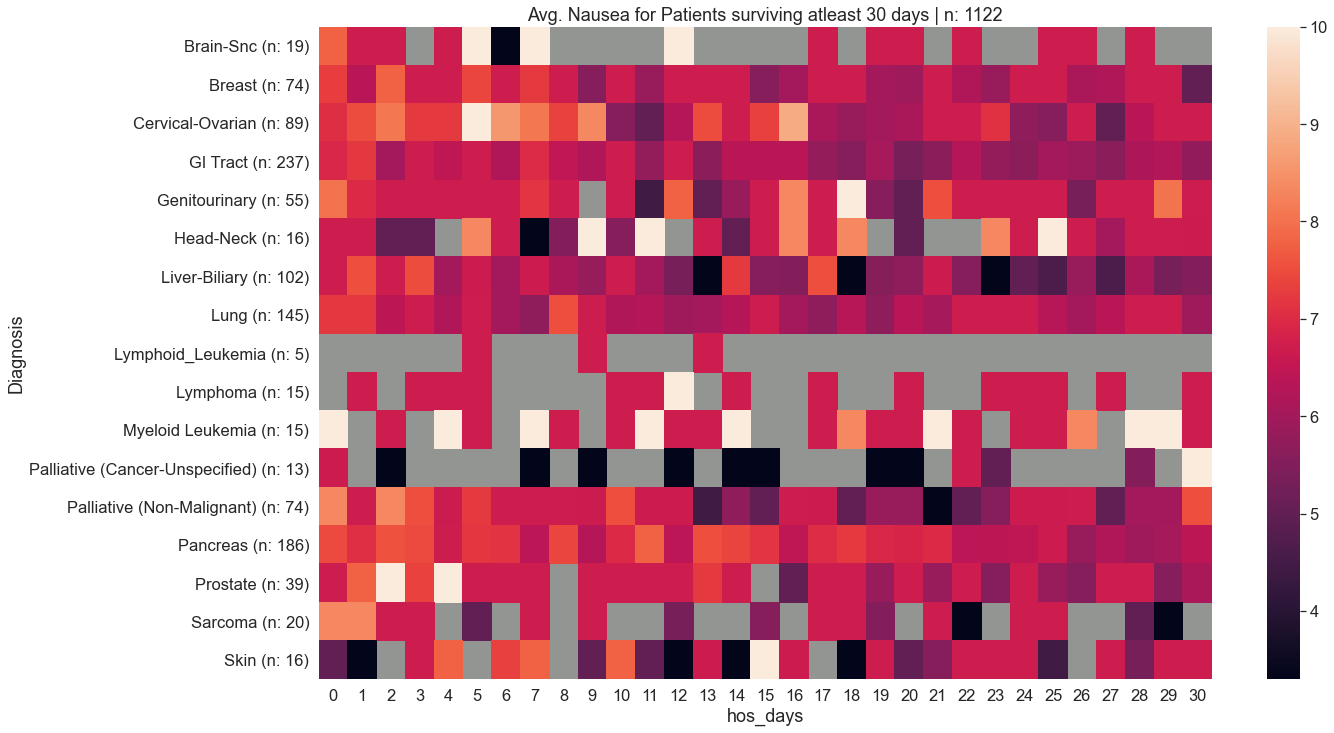

In [101]:
ax = plt.axes()
sns.heatmap(df_n6, annot=False, fmt='.1g', ax=ax)
ax.set_facecolor('xkcd:grey')
ax.set_title('Avg. Nausea for Patients surviving atleast 30 days | n: ' + str(p_num))
plt.savefig('./graphs/gi/nau_avg_heatmap_a30.png', bbox_inches='tight')
plt.show()

In [102]:
get_coeffs(df_n6, 30)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,deg1 (m),deg2 (x2),deg2 (x1)
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc (n: 19),7.800000,6.700000,6.700000,NaN,6.700000,10.000000,3.300000,10.000000,NaN,NaN,...,NaN,6.700000,6.700000,NaN,6.700000,NaN,NaN,undef,undef,undef
Breast (n: 74),7.290909,6.360000,7.800000,6.700000,6.700000,7.422222,6.687500,7.250000,6.700000,5.566667,...,6.700000,6.700000,6.133333,6.200000,6.700000,6.700000,5.000000,-0.03,0,-0.07
Cervical-Ovarian (n: 89),7.055556,7.512500,8.114286,7.233333,7.250000,10.000000,8.585714,8.114286,7.360000,8.350000,...,5.728571,5.566667,6.700000,5.000000,6.381818,6.700000,6.677778,-0.06,0,-0.1
GI Tract (n: 237),6.937037,7.224000,6.015000,6.695238,6.442857,6.686957,6.207143,7.000000,6.488235,6.209524,...,5.675000,6.020000,5.894118,5.608000,6.161538,6.252174,5.744444,-0.03,0,-0.08
Genitourinary (n: 55),8.020000,6.975000,6.700000,6.700000,6.700000,6.700000,6.700000,7.171429,6.700000,NaN,...,6.700000,6.700000,5.340000,6.700000,6.700000,8.020000,6.700000,undef,undef,undef
Head-Neck (n: 16),6.700000,6.700000,5.000000,5.000000,NaN,8.350000,6.700000,3.300000,5.533333,10.000000,...,6.700000,10.000000,6.700000,6.020000,6.700000,6.700000,6.666667,undef,undef,undef
Liver-Biliary (n: 102),6.687500,7.525000,6.700000,7.500000,6.000000,6.666667,6.020000,6.675000,6.116667,5.825000,...,5.000000,4.660000,5.850000,4.640000,6.116667,5.320000,5.550000,-0.06,0,-0.16
Lung (n: 145),7.215789,7.200000,6.416667,6.700000,6.214286,6.684615,6.020000,5.728571,7.525000,6.681818,...,6.688889,6.311111,6.010000,6.381818,6.677778,6.685714,5.944444,-0.01,0,-0.08
Lymphoid_Leukemia (n: 5),NaN,NaN,NaN,NaN,NaN,6.700000,NaN,NaN,NaN,6.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undef,undef,undef
